**Tổng quan về trang code**
---
1. Thiết lập bài toán knapsack.
2. Thiết lập các hàm và tham số cần thiết và tổng hợp các hàm đã tạo để chạy .
3. Thiết lập các phương pháp để đánh giá kết quả. 
4. Các thí nghiệm khác, nhận xét, các cách cải tiến. 



**Các hàm trong bài sử dụng:**
---
1. **generate_knapsack_problem(num_items, max_weight)** - Dùng để tạo ngẫu nhiên vấn đề knapsack.
2. **knapsack(weights, values, capacity)** - Dùng để giải bài toán knapsack bằng cách duyệt qua từng nhiễm sắc thể có khả năng. 
3. **fitness(individual) và weight(individual)** - Dùng để tính giá trị và cân nặng của từng tổ hợp vật phẩm có thể.
4. **selection(population, [tournament_size])** - Dùng để chọn ra phụ huynh (có nhiều cách chọn khác nhau nhưng nhóm sẽ chỉ dùng kiểu chọn vòng xoay và chọn kiểu đấu trường).
5. **crossover(parent1, parent2, crossover_rate)** - Dùng để lai tạo nhiễm sắc thể 1 với nhiễm sắc thể 2 (nhóm gọi là cá thể do đang dùng population với ý nghĩa là quần thể). Có nhiều cách để lai tạo nhưng nhóm sẽ thử với 2 cách đó là single-point crossover và two-point crossover. 
6. **mutate(individual)** - Dùng để thay đổi mã gen trong 1 nhiễm sắc thể với một xác suất nhất định, ở đây nhóm dùng theo kiểu bit-flip mutation.
7. **run_genetic_algorithm_original(initial_population, max_generations)** - Hàm này kết hợp với các hàm trên để chạy và in ra cá thể tốt nhất trong quần thể của thế hệ cuối cùng. Tham số max_generations là để xác định xem số generations tối đa mà hàm cần chạy, trong thử nghiệm nhóm cho tham số này có giá trị là nums_generation.
8. **plot_best_fit(best_fitness, num_generations)** - Dùng để in ra đồ thị thể hiện giá trị fitness của từng cá thể tốt nhất trong quần thể qua từng thế hệ. 
9. **plot_best_avg(avg_fitness, num_generations)** - Cũng tương tự như hàm trên nhưng hàm này dùng để in ra giá trị fitness trung bình của toàn thể quần thể qua từng thế hệ. 
10. **convergence_rate(best_fitness, threshold_fitness)** - Dùng để trả về số thế hệ cần thiết để chạm đến (hoặc vượt qua) một fitness threshold nhất định. 
11. **run_genetic_algorithm_x(initial_population, max_generations)** - Các chức năng tương tự như hàm sô s7 nhưng được thiết kế để thử nghiệm nhiều thí nghiệm x khác nhau, do vậy nên nó mới có hậu tố x ở đuôi.

**Đặt câu hỏi và thiết lập các thí nghiệm**
---
1. Ảnh hưởng của các tham số như kích thước quần thể, số lượng thế hệ, tỉ lệ lai tạo, tỉ lệ đột biến tới các giá trị best fitness của thế hệ cuối cùng.
2. Việc thiết lập các toán tử di truyền khác nhau có ảnh hưởng đến kết quả best fitness hay không?
3. Đồ thị cho thấy tính trạng tốt nhất của quần thể không được bảo tồn qua từng thế hệ, các cách tiếp cận khác để bảo vệ tính trạng tốt nhất của quần thể. 
4. Ảnh hưởng của dữ liệu bài toán knapsack (số lượng vật thể, cân nặng và giá trị của từng vật thể) tới kết quả của bài toán. 


In [ ]:
from IPython.display import clear_output 

**Thiết lập bài toán knapsack**

In [ ]:
import random 
from statistics import mean  
values = []
weights = []
capcity = 0
num_items = 20
max_weight = 20
def generate_knapsack_problem(num_items, max_weight):
    X = [random.randint(1, 100) for _ in range(num_items)]
    global values
    values = X.copy()
    y = [random.randint(1, max_weight) for _ in range(num_items)]
    global weights
    weights = y.copy()
    z = sum(weights) * 0.6
    global capacity
    capacity = int(z)
    return values, weights, capacity

In [ ]:
random.seed(42) #Khong cho so chay lung tung
generate_knapsack_problem(num_items, max_weight)
print("values: ", values)
print("weights: ", weights)
print("knapsack's capacity: ", capacity)

values:  [82, 15, 4, 95, 36, 32, 29, 18, 95, 14, 87, 95, 70, 12, 76, 55, 5, 4, 12, 28]
weights:  [8, 17, 20, 1, 18, 7, 18, 14, 8, 15, 19, 9, 1, 6, 14, 11, 9, 5, 7, 11]
knapsack's capacity:  130


**Sử dụng hướng tiếp cận brute-force để tìm kết quả CHÍNH XÁC của bài toán knapsack**

In [ ]:
def knapsack_brute_force(values, weights, capacity):
    n = len(values)
    best_value = 0
    best_selection = []
    total_weight = 0

    # Generate all possible combinations of selections
    for i in range(2**n):
        selection = [int(d) for d in str(bin(i))[2:].zfill(n)]
        current_weight = sum([selection[j] * weights[j] for j in range(n)])
        
        # Check if total weight is within the capacity
        if current_weight <= capacity:
            total_value = sum([selection[j] * values[j] for j in range(n)])
            
            # Update the best solution if a higher value is found
            if total_value > best_value:
                best_value = total_value
                best_selection = selection
                total_weight = current_weight

    return best_selection, best_value, total_weight

correct_ans, best_fitness, total_weight = knapsack_brute_force(values, weights, capacity)
print("values: ", values)
print("weights: ", weights)
print("knapsack's capacity: ", capacity)
print("Best Selection:", correct_ans)
print("Best Value:", best_fitness)
print("Total Weight:", total_weight)

values:  [82, 15, 4, 95, 36, 32, 29, 18, 95, 14, 87, 95, 70, 12, 76, 55, 5, 4, 12, 28]
weights:  [8, 17, 20, 1, 18, 7, 18, 14, 8, 15, 19, 9, 1, 6, 14, 11, 9, 5, 7, 11]
knapsack's capacity:  130
Best Selection: [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Best Value: 784
Total Weight: 130


In [ ]:
#Kiem tra lai ket qua
import numpy as np
print("Best value: ",np.dot(values, correct_ans))
print("Toatal weight: ",np.dot(weights, correct_ans))

Best value:  784
Toatal weight:  130


**Giải thuật di truyền cho bài toán knapsack**

In [ ]:
#Import module cần thiết
import random
import time
#Tham số cho GA (duoc de xuat)
population_size = 100
mutation_rate = 0.001
crossover_rate = 0.5
num_generations = 100
values
weights
capacity
clear_output()

In [ ]:
def fitness(individual):
        total_value = 0
        total_weight = 0
        for i in range(num_items):
            if individual[i] == 1:
                total_value += values[i]
                total_weight += weights[i]
        if total_weight > capacity:
            return 0
        else:
            return total_value


def weight(individual):
        total_value = 0
        total_weight = 0
        for i in range(num_items):
            if individual[i] == 1:
                total_value += values[i]
                total_weight += weights[i]
        if total_weight > capacity:
            return 0
        else:
            return total_weight

In [ ]:
#Hàm chọn theo kiểu đấu trường
def selection_tournament(population, tournament_size):
      offspring_population = []
      for i in range(len(population)):
        competitors = random.sample(population, tournament_size)
        winner = max(competitors, key=lambda individual: fitness(individual))
        offspring_population.append(winner)
      return offspring_population

In [ ]:
#Hàm lai tạo theo kiểu crossover single point
def crossover_singlepoint(parent1, parent2, crossover_rate):
        midpoint = random.randint(1, num_items - 1)
        if random.random() < crossover_rate:
          child = parent1[:midpoint] + parent2[midpoint:]
        else: 
          child = parent1[:]
        return child

In [ ]:
#Hàm đột biến theo kiểu bit-flip 
def mutate_bitflip(individual):
        for i in range(num_items):
            if random.random() < mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

**Tạo ra quần thể khởi tạo**

In [ ]:
random.seed(42)
population = [[random.randint(0, 1) for i in range(num_items)] 
                  for j in range(population_size)]

7. Kết hợp các hàm ở trên và chạy chương trình

In [ ]:
best_fitness_standard = []
avg_fitness_standard = []
tournament_size = 2


def run_genetic_algorithm_original(initial_population, max_generations): #Khong muon bo seed vao trong ham do muon moi lan chay se cho ra mot ket qua khac
  population = initial_population.copy()

  best_fit = []
  avg_fit = []
  for generation in range(num_generations):
        #Xác định individual có fitness tốt nhất trong mỗi thế hệ
        best_individual = max(population, key=fitness)
        best_fit.append(best_individual)
        #Xác định giá trị fitness trung bình trong quần thể trong mỗi thế hệ
        fit_values = [fitness(i) for i in population]
        mean_fit = mean(fit_values)
        avg_fit.append(mean_fit)
        population = selection_tournament(population, tournament_size)
        offspring_population = []
        for i in range(population_size):
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child = crossover_singlepoint(parent1, parent2, crossover_rate = crossover_rate)
            child = mutate_bitflip(child)
            offspring_population.append(child)
        population = offspring_population

  X = best_fit
  global best_fitness_standard
  best_fitness_standard = X.copy()  
  Y = avg_fit
  global avg_fitness_standard
  avg_fitness_standard = Y.copy()

  best_individual = max(population, key=fitness)
  print("=======================================================================================")
  print("The exact solutions for knapsack is: ", correct_ans)
  print("Maximum values of knapsack is: ", best_fitness)
  #print("Total weight of knapsack is: ", total_weight)
  print("Maximum weight of knapsack is: ", capacity)
  print("=======================================================================================")
  print("Best individual in population in final generation:", best_individual)
  print("Best fitness in population in final generation:", fitness(best_individual))
  print("Weights of the best individual: ", weight(best_individual))
  print("=======================================================================================")

  return population, best_individual

In [ ]:
random.seed(42) #De seed de no khong bi nhay so 
last_population_0, best_individual_0 = run_genetic_algorithm_original(population, num_generations)

The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]
Best fitness in population in final generation: 752
Weights of the best individual:  130


**Phương pháp đánh giá**


1. Đánh giá bằng đồ thị.

In [ ]:
# In ra các fitness của các individual có kết quả tốt nhất trong mỗi generation. 
def plot_best_fit(input_best_fitness: list, num_generations: int):
  best_fit_score = [fitness(i) for i in input_best_fitness]
  import matplotlib.pyplot as plt
  generation_numbers = list(range(1, num_generations+1))
  plt.figure(figsize=(20,10))
  plt.plot(generation_numbers, best_fit_score)
  plt.xlabel('Generation')
  plt.ylabel('best fitness')
  plt.title('best fitness over ' + str(num_generations) + ' Generations')
  plt.show()
  input_best_fitness = []

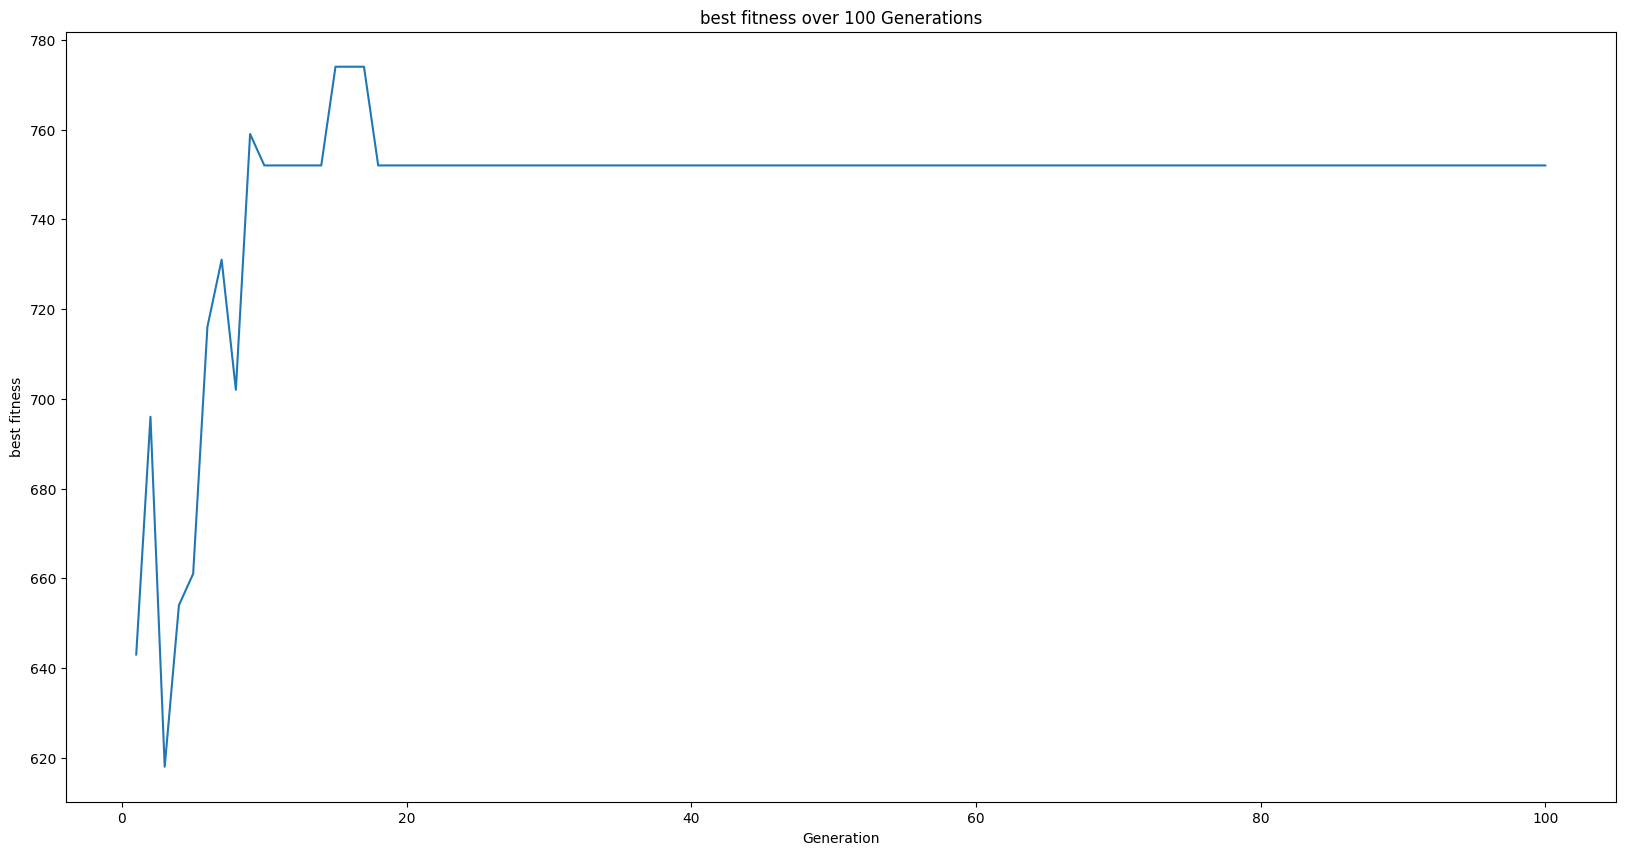

In [ ]:
plot_best_fit(best_fitness_standard, num_generations)

In [ ]:
# In ra trung bình fitness của population trong mỗi generation
def plot_avg_fit(input_avg_fitness: list, num_generations: int):
  avg_fit_score = [i for i in input_avg_fitness]
  import matplotlib.pyplot as plt
  generation_numbers = list(range(1, num_generations+1))
  plt.figure(figsize=(20,10))
  plt.plot(generation_numbers, avg_fit_score)
  plt.xlabel('Generation')
  plt.ylabel('average fitness')
  plt.title('average fitness over ' + str(num_generations) + ' Generations')
  plt.show()
  input_avg_fitness = [] 

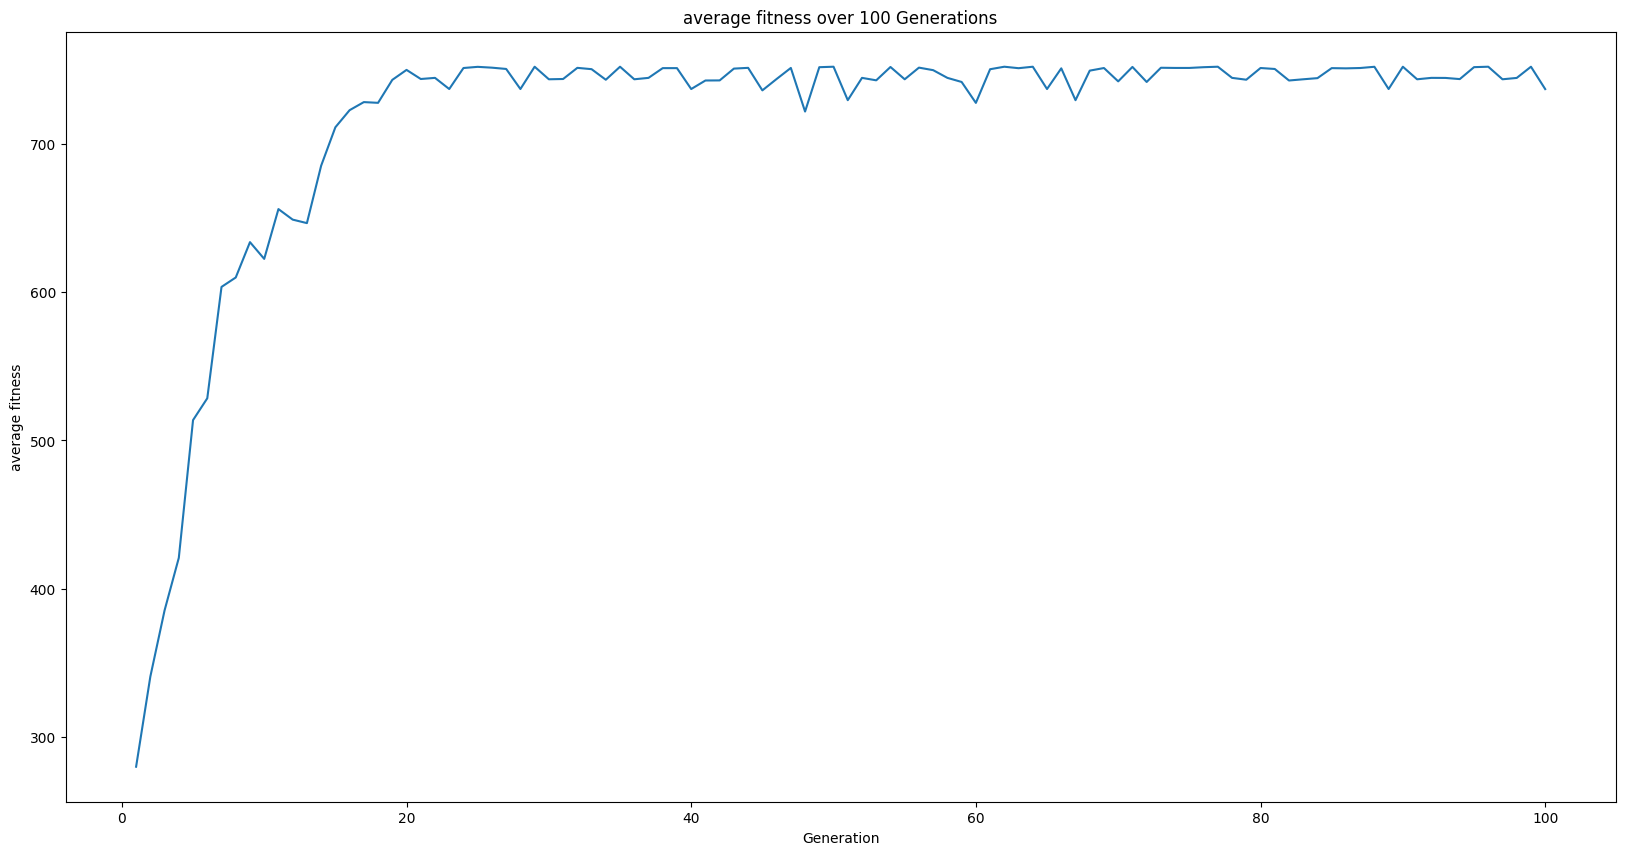

In [ ]:
plot_avg_fit(avg_fitness_standard, num_generations)

2. Đánh giá bằng tốc độ hội tụ.

In [ ]:
#Hàm này trả về số thế hệ cần thiết để đạt được cái threshold cho fitness
def convergence_rate(input_best_fitness: list, threshold_fitness: float):
    best_fit_score = [fitness(i) for i in input_best_fitness]
    reached = False
    for i in range(len(best_fit_score)):
      if best_fit_score[i] >= threshold_fitness:
        print("After " + str(i+1) + " generations, we reached fitness's threshold "+f"({threshold_fitness})")
        global reach
        reach = True
        reached = reach
        break
      else:
        reached == False
    if reached == False:
      print(f"Can't reach the limit threshold ({threshold_fitness})")

In [ ]:
convergence_rate(best_fitness_standard, 699.5)

After 6 generations, we reached fitness's threshold (699.5)


**Các thí nghiệm khác cho bài toán này:**

**Thí nghiệm 1** 
---
Ảnh hưởng của các tham số đến kết quả của bài toán.


In [ ]:
#Import module cần thiết
import random
import time
#Tham số cho GA (duoc de xuat)
population_size = 100
mutation_rate = 0.001
crossover_rate = 0.5
num_generations = 100
values
weights
capacity
clear_output()

random.seed(42)
#Standard
best_fit_ex_1_0 = []

for i in range(30): #Ban đầu nhóm để 100 nhưng mà nó chạy lâu quá nên nhóm để nó xuống 30 thôi cho chạy nhanh nhanh (1mins)
  last_population_1_0, best_individual_1_0 = run_genetic_algorithm_original(population, num_generations)
  best_fit_ex_1_0.append(fitness(best_individual_1_0))

clear_output()

1.1 Tăng kích thước quần thể

In [ ]:
#Import module
import random
import time
#Tham số cho GA
population_size = 1000
mutation_rate = 0.001
crossover_rate = 0.5
num_generations = 100
values
weights
capacity
num_items = 20


1000
The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]
Best fitness in population in final generation: 781
Weights of the best individual:  128
After 1 generations, we reached fitness's threshold (750)


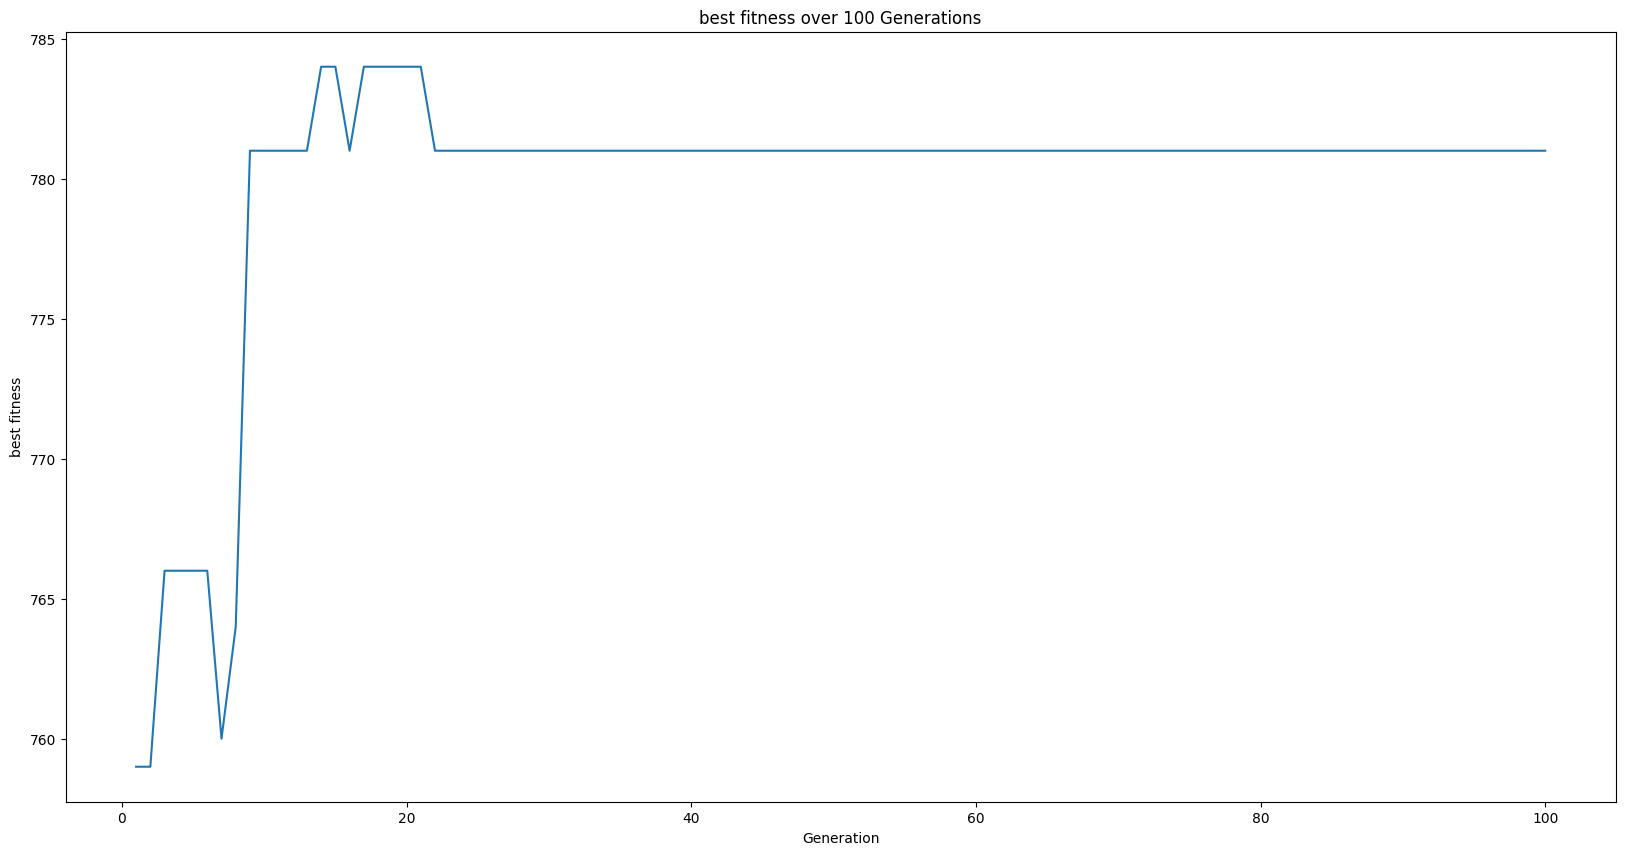

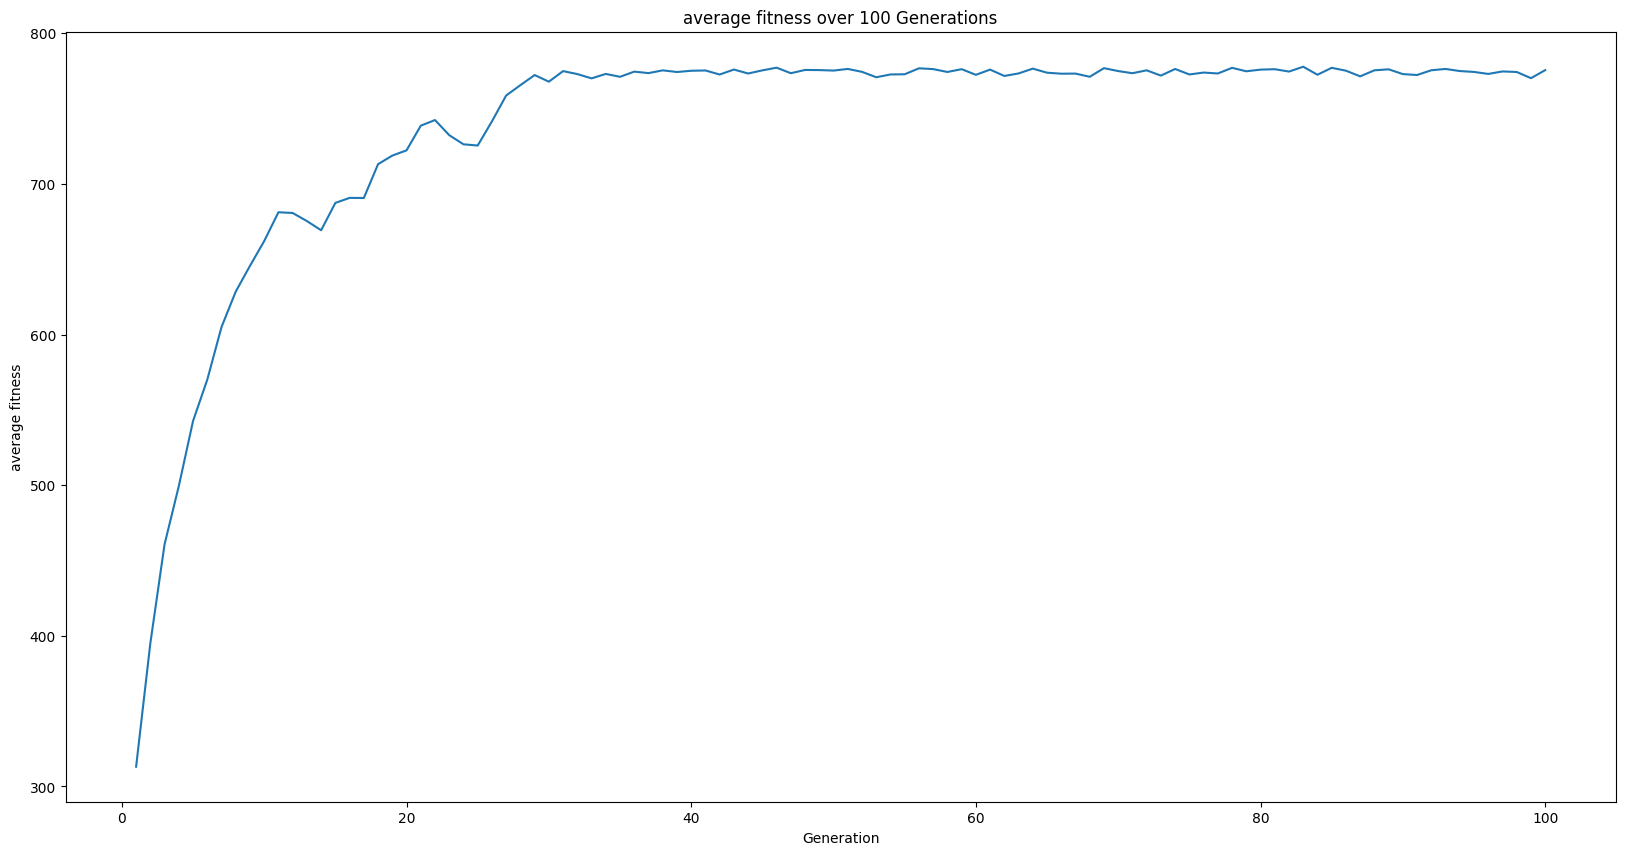

In [ ]:
random.seed(42)
population = [[random.randint(0, 1) for i in range(num_items)] 
                  for j in range(population_size)]
print(len(population))
last_population_1_1, best_individual_1_1 = run_genetic_algorithm_original(population, num_generations)
convergence_rate(best_fitness_standard,750)
plot_best_fit(best_fitness_standard, num_generations)
plot_avg_fit(avg_fitness_standard, num_generations)

Tổng kết thí nghiệm 1.1 

In [ ]:
random.seed(42)
#Tổng kết thí nghiệm 1.1
best_fit_ex_1_1 = []

for i in range(30): #Ban đầu nhóm để 100 nhưng mà nó chạy lâu quá nên nhóm để nó xuống 30 thôi cho chạy nhanh nhanh (1mins)
  last_population_1_1, best_individual_1_1 = run_genetic_algorithm_original(population, num_generations)
  best_fit_ex_1_1.append(fitness(best_individual_1_1))

clear_output()

**Nhận xét thí nghiệm 1.1** - Theo thực nghiệm, nhóm quan sát thấy việc tăng kích thước quần thể khiến cho kết quả cuối cùng tốt hơn một cách rõ rệt, ngoài ra việc tăng kích thước quần thể cũng khiến cho các kết quả tốt nhất qua các lần thử không dao động nhiều và nhìn có vẻ rất ổn định, do khả năng cao nó đã hội tụ tới một điểm tối ưu toàn cục, điều này là không xảy ra khi chúng ta có một kích thước quần thể nhỏ so với bài toán đặt ra (20 vật phẩm). Ngoài ra còn có một điểm lưu ý khác khi tăng quần thể lên, một điều tất yếu xảy ra đó chính là việc thời gian chạy sẽ lâu hơn.

1.2 Tăng số lượng thế hệ

In [ ]:
#Import module
import random
import time
from pprint import pprint as pp
#Tham số cho GA
population_size = 100
mutation_rate = 0.001
crossover_rate = 0.5
num_generations = 1000
values
weights
capacity
num_items = 20
clear_output()

100
The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]
Best fitness in population in final generation: 781
Weights of the best individual:  128


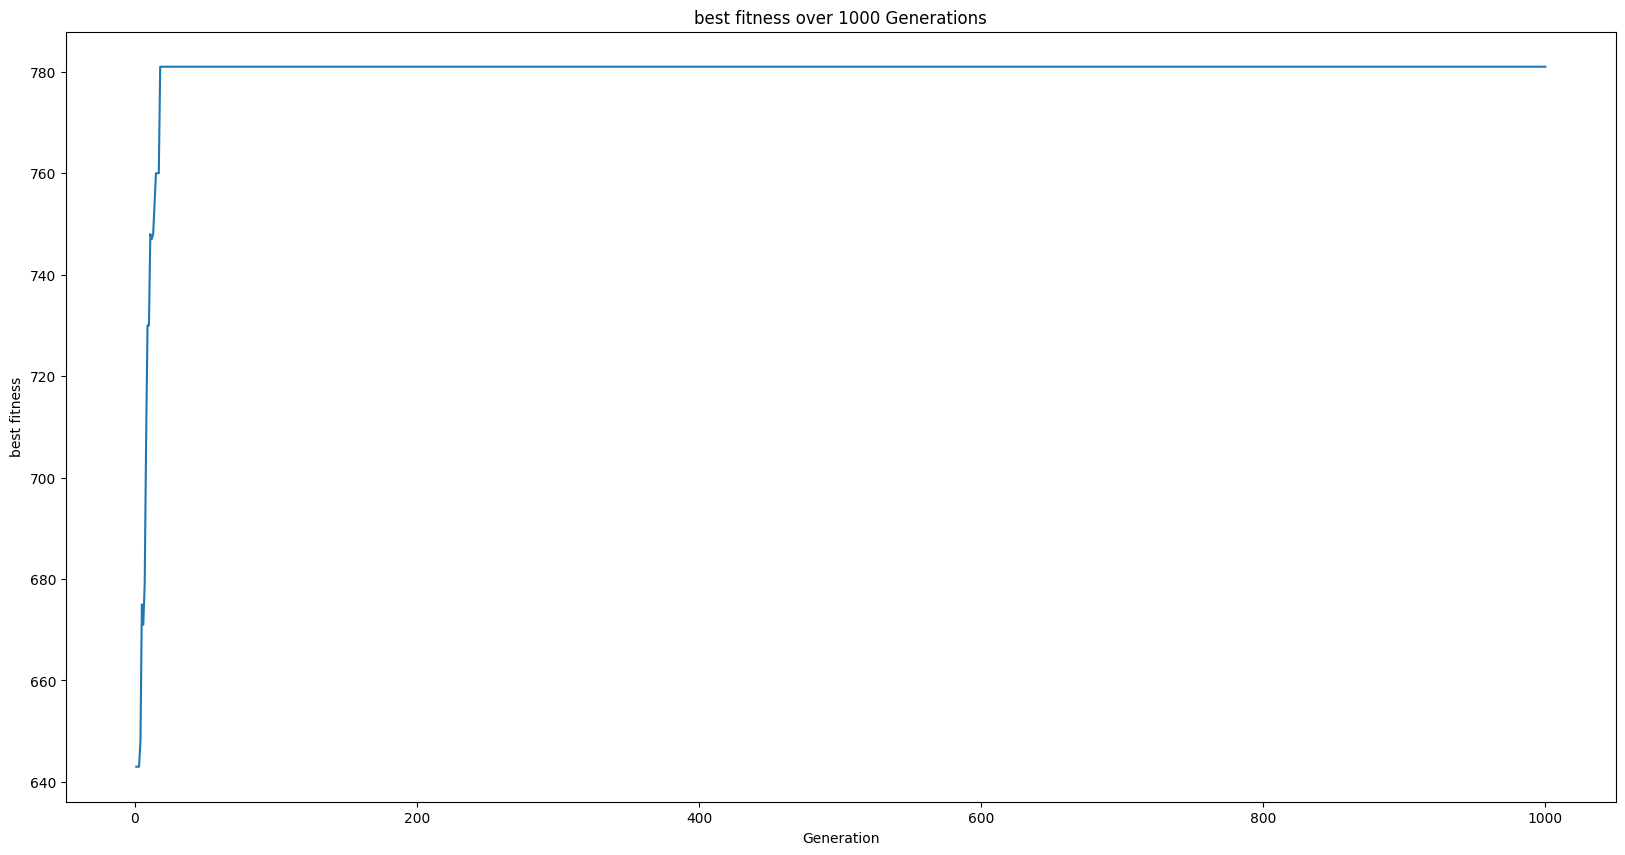

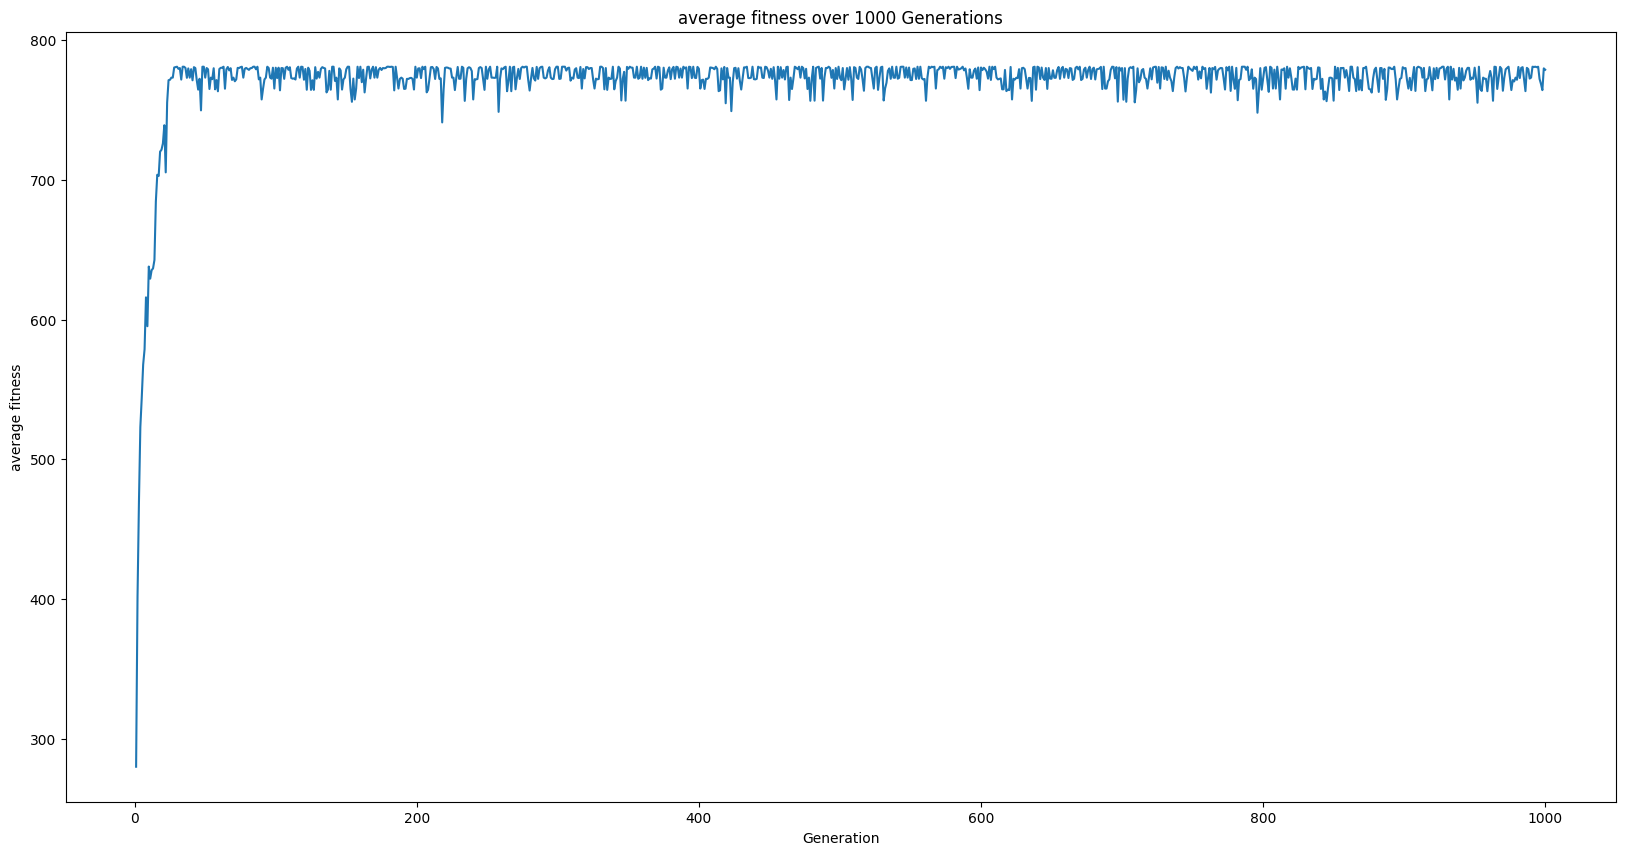

After 15 generations, we reached fitness's threshold (760)


In [ ]:
random.seed(42)
population = [[random.randint(0, 1) for i in range(num_items)] 
                  for j in range(population_size)]
print(len(population))
last_population_1_2, best_individual_1_2 = run_genetic_algorithm_original(population,num_generations)
plot_best_fit(best_fitness_standard, num_generations)

plot_avg_fit(avg_fitness_standard, num_generations)
convergence_rate(best_fitness_standard, 760)

Tổng kết thí nghiệm 1.2

In [ ]:
#Tổng kết thí nghiệm 1.2
random.seed(42)
best_fit_ex_1_2 = []

for i in range(30): #Ban đầu nhóm để 100 nhưng mà nó chạy lâu quá nên nhóm để nó xuống 30 thôi cho chạy nhanh nhanh.
  last_population_1_2, best_individual_1_2 = run_genetic_algorithm_original(population, num_generations)
  best_fit_ex_1_2.append(fitness(best_individual_1_2))
  clear_output()

**Nhận xét thí nghiệm 1.2** - Không như việc tăng kích thước quần thể, việc chúng ta tăng số lượng thế hệ không đảm bảo việc kết quả best fitness sẽ ổn định qua các lần thử khác nhau, trên thực tế nó vẫn sẽ tồn tại những biến động và biến động này là lớn so với các biến động trong việc tăng kích thước của quần thể. Do đó mà theo như thực nghiệm, nhóm rút ra kết luận là nhìn chung, việc tăng số lượng thế hệ không giúp ích gì nhiều trong việc đưa ra các kết quả fitness tốt hơn, vậy mà nó còn làm tốn thời gian hơn. 

1.3 Thay đổi tỉ lệ đột biến lên cao (khoảng 0.5)

In [ ]:
#Import module
import random
import time
#Tham số cho GA
population_size = 100
mutation_rate = 0.5
crossover_rate = 0.5
num_generations = 100
values
weights
capacity
num_items = 20
clear_output()

The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Best fitness in population in final generation: 688
Weights of the best individual:  129


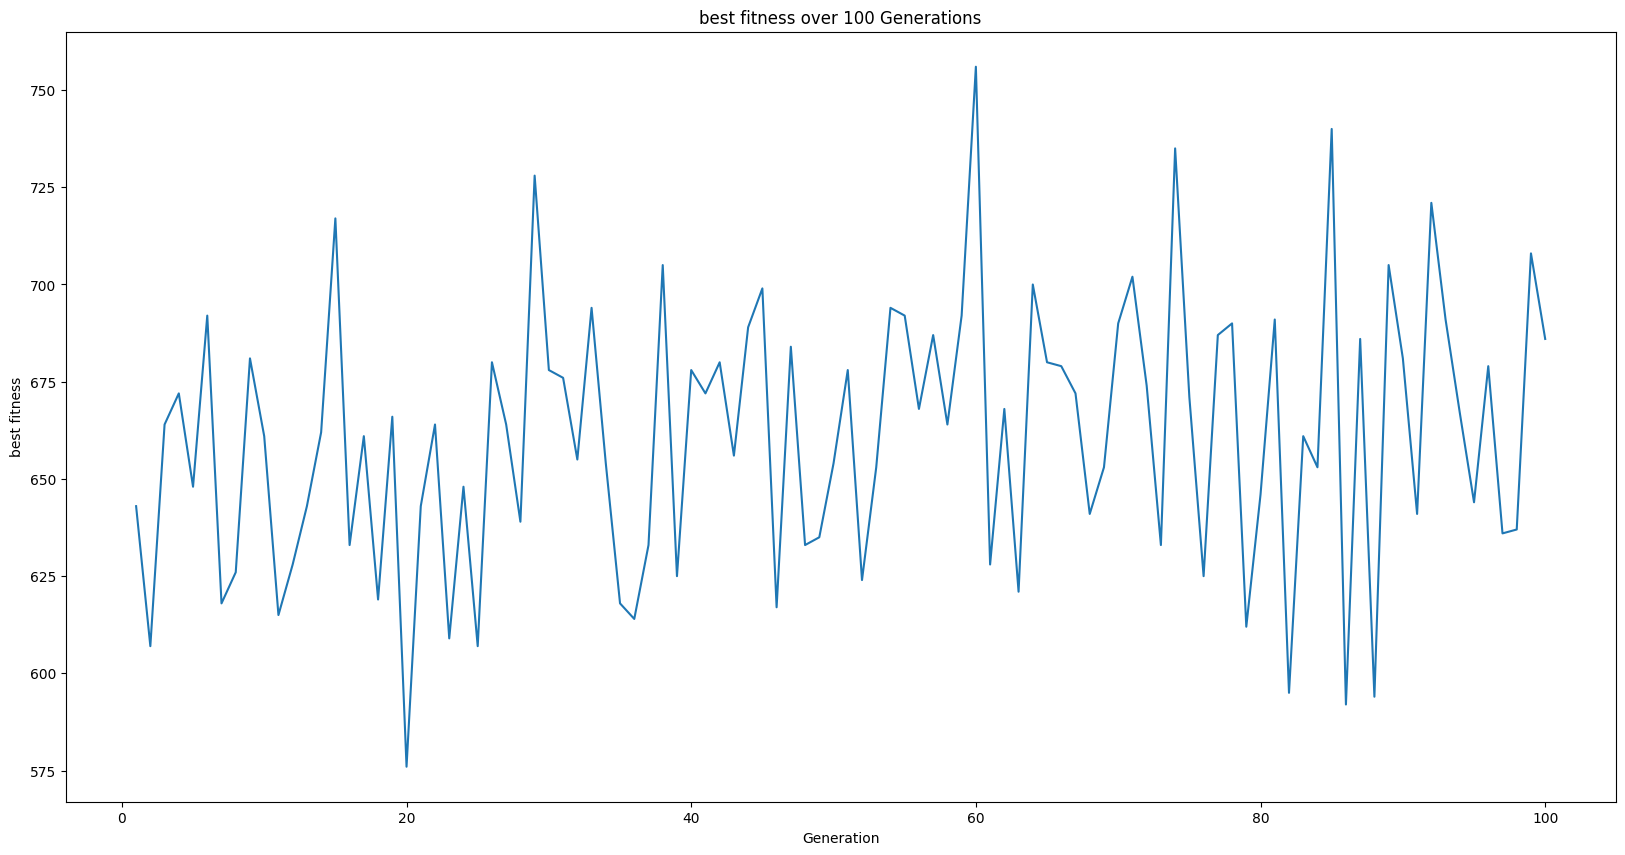

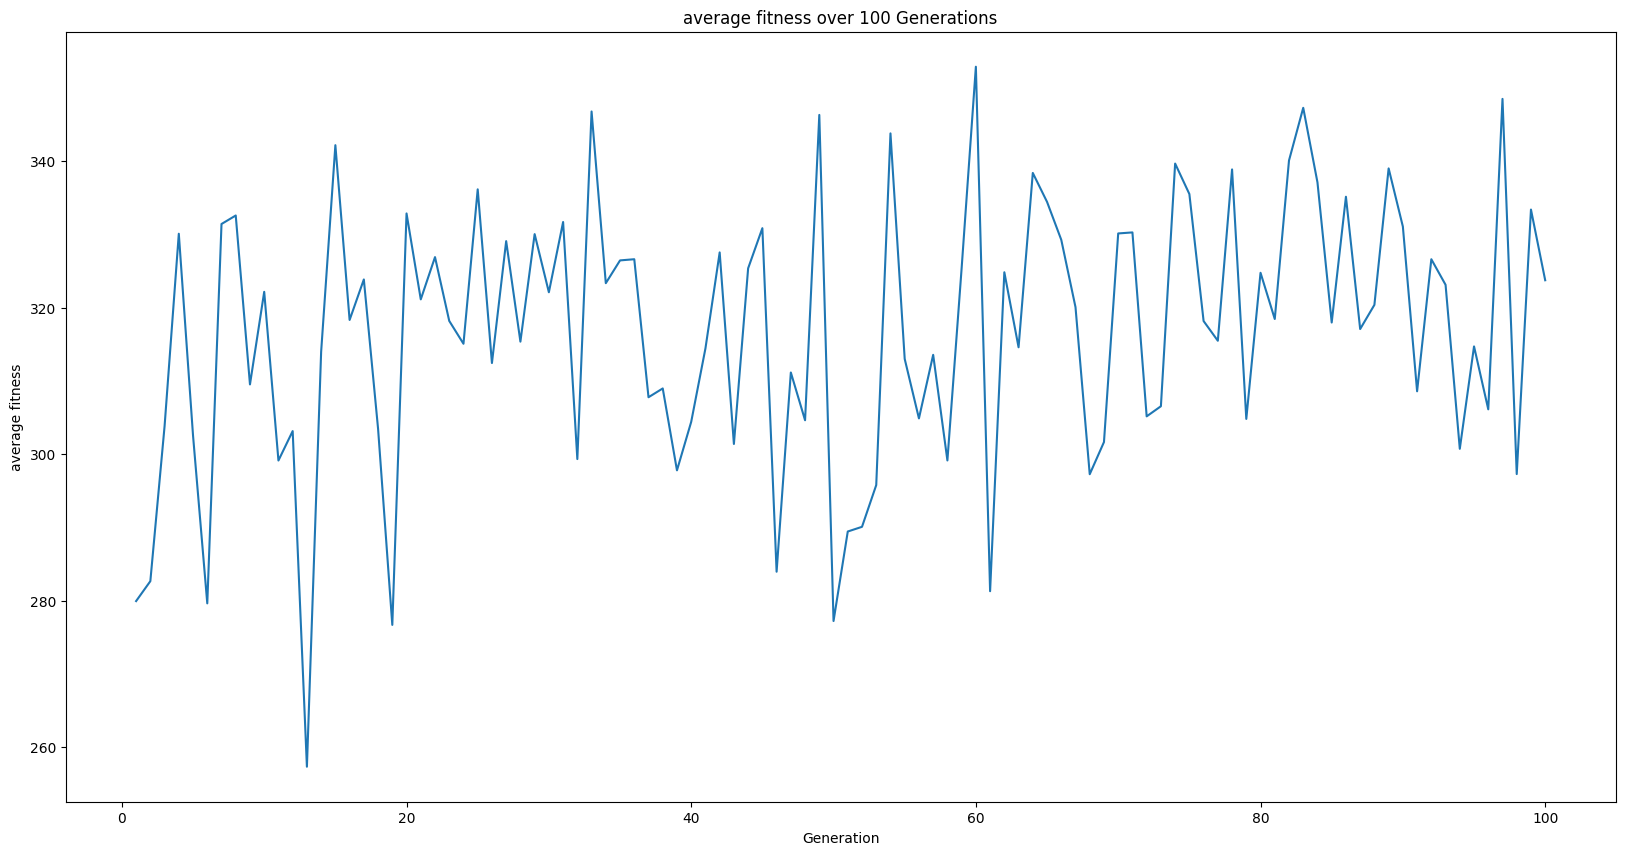

Can't reach the limit threshold (760)


In [ ]:
random.seed(42)
last_population_1_3, best_individual_1_3 = run_genetic_algorithm_original(population, num_generations)
plot_best_fit(best_fitness_standard, num_generations)  
plot_avg_fit(avg_fitness_standard, num_generations)
convergence_rate(best_fitness_standard, 760)

Tổng kết thí nghiệm 1.3

In [ ]:
#Tổng kết thí nghiệm 1.3
random.seed(42)
best_fit_ex_1_3 = []

for i in range(30): #Ban đầu nhóm để 100 nhưng mà nó chạy lâu quá nên nhóm để nó xuống 10 thôi cho chạy nhanh nhanh.
  last_population_1_3, best_individual_1_3 = run_genetic_algorithm_original(population, num_generations)
  best_fit_ex_1_3.append(fitness(best_individual_1_3))
  clear_output()

**Nhận xét thí nghiệm 1.3** - Việc tăng tỉ lệ đột biến sẽ khiến cho best fitness qua từng thế hệ giao động nhiều. Bản thân việc chúng ta đột biến các gen là để tăng không gian tìm kiếm lên, nhưng cái việc chúng ta chọn lọc và lai tạo là để có được các cá thể mạnh, việc đẩy tỉ lệ đột biến lên cao khiến cho kết quả dao động mạnh, và (theo thực nghiệm)nhiều khi kém chính xác, nó kéo performance ziczac trong một khoảng mà khoảng này về cơ bản là không có fitness value cao, nên nhìn chung thì việc đẩy tỉ lệ đột biến lên quá cao có ảnh hưởng không tốt tới performance của thuật toán. Và theo như tham khảo từ nhiều nguồn trên mạng, thì nên để mutation rate ở mức 0.1% -> 1% thì kết quả quả quan hơn.

1.4 Thay đổi tỉ lệ lai tạo lên cao va xuong thap

In [ ]:
#Import module
import random
import time
#Tham số cho GA
population_size = 100
mutation_rate = 0.001
crossover_rate = 0.85 #Ti le lai tao cao
num_generations = 100
values
weights
capacity
num_items = 20

The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]
Best fitness in population in final generation: 774
Weights of the best individual:  128


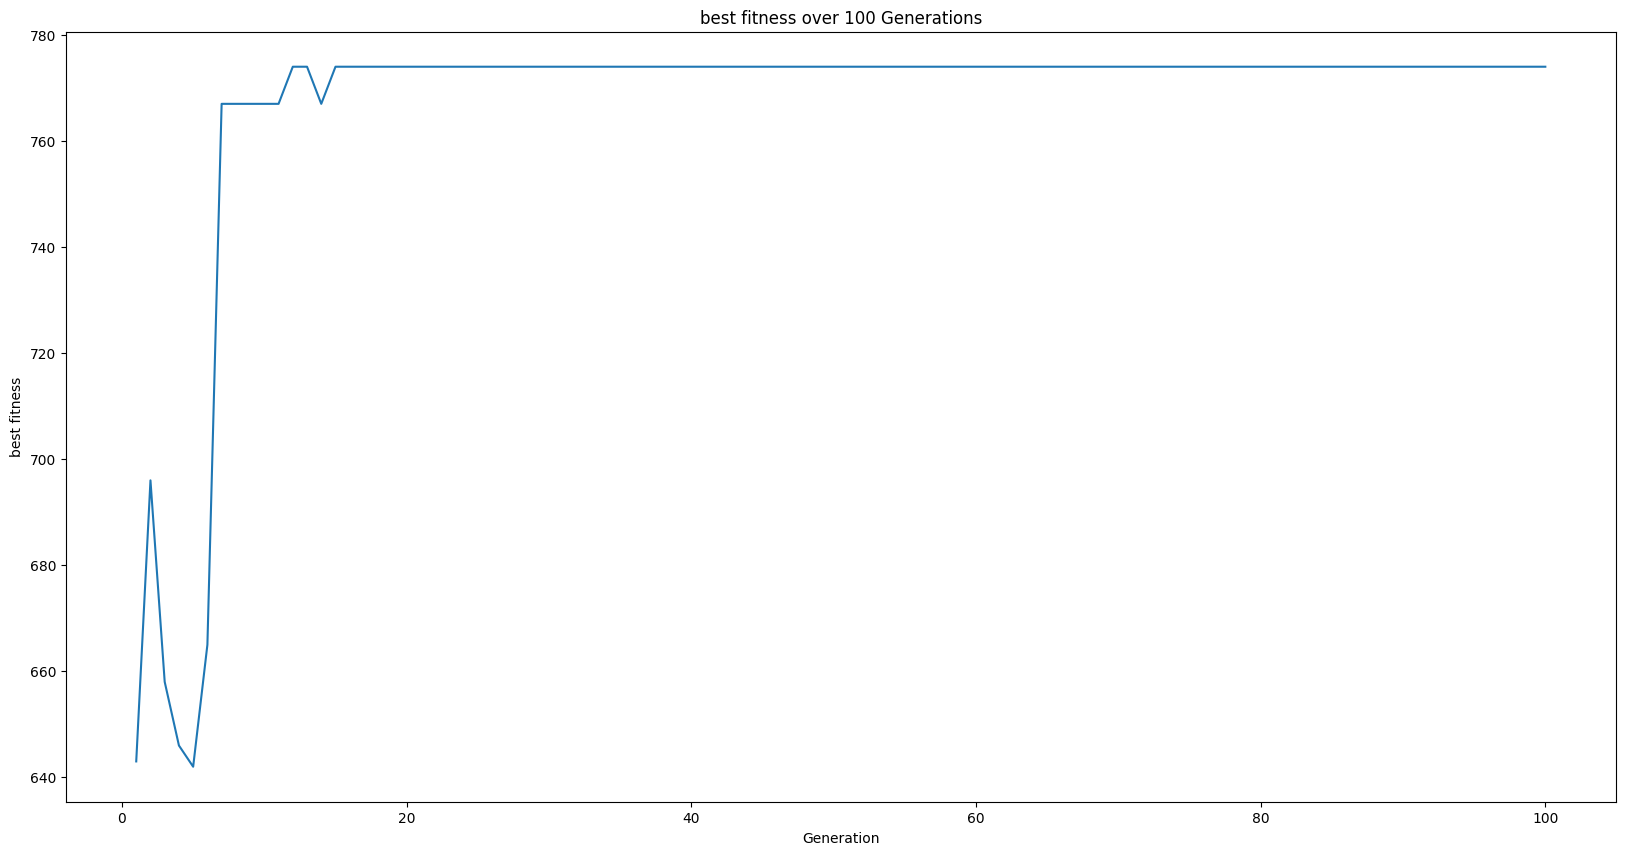

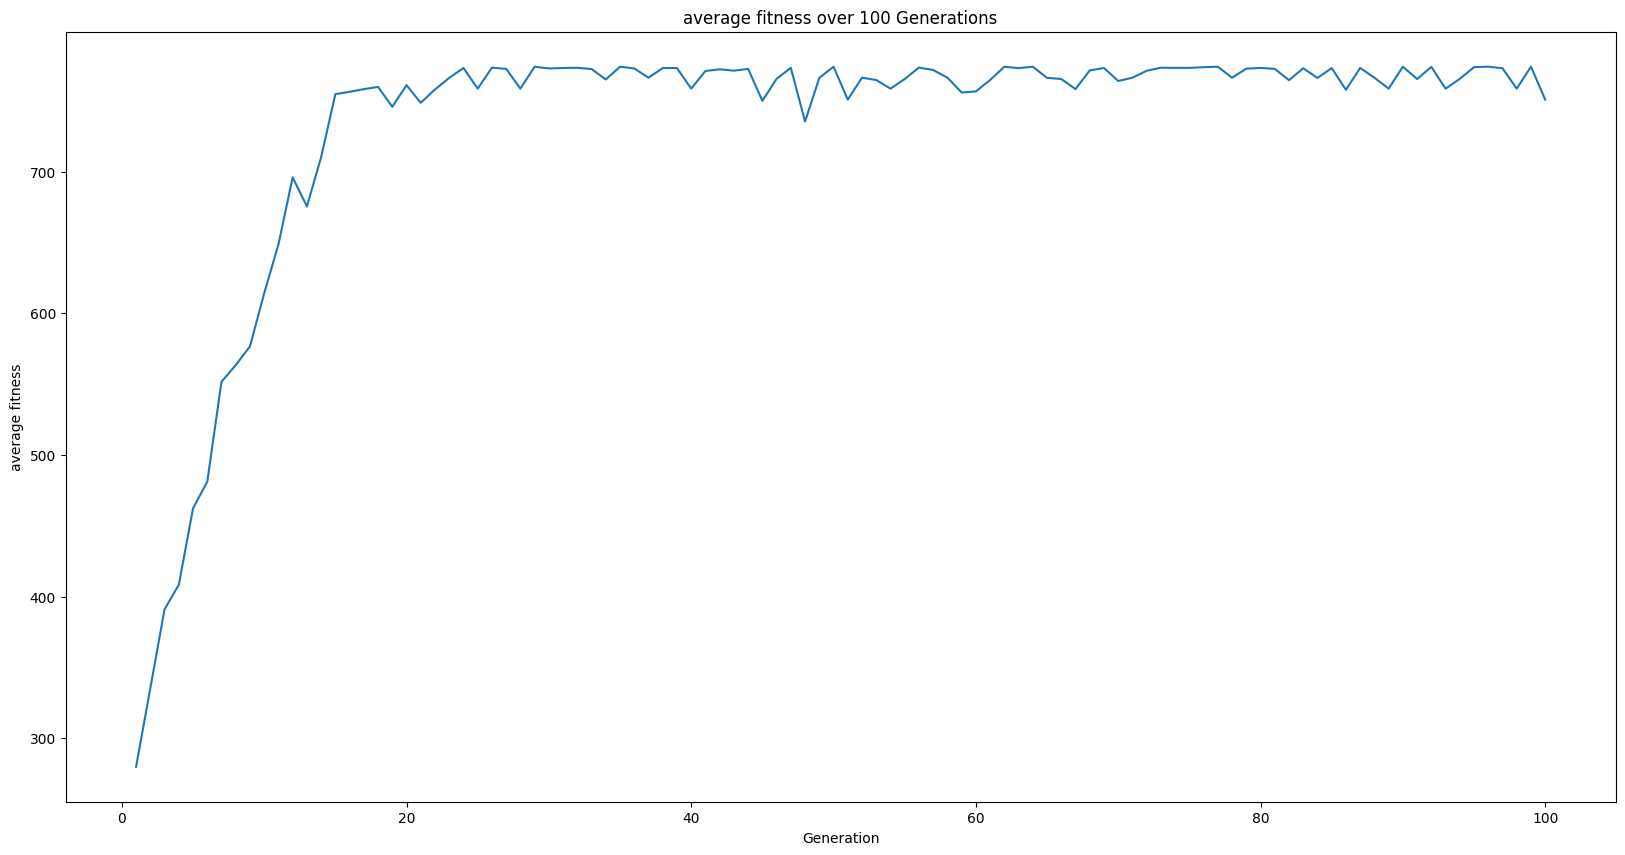

After 7 generations, we reached fitness's threshold (760)


In [ ]:
random.seed(42)
last_population_1_4, best_individual_1_4 = run_genetic_algorithm_original(population, num_generations)
plot_best_fit(best_fitness_standard, num_generations)  
plot_avg_fit(avg_fitness_standard, num_generations)
convergence_rate(best_fitness_standard, 760)

In [ ]:
#Import module
import random
import time
#Tham số cho GA
population_size = 100
mutation_rate = 0.001
crossover_rate = 0.01 #Ti le lai tao thap
num_generations = 100
values
weights
capacity
num_items = 20

The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
Best fitness in population in final generation: 712
Weights of the best individual:  126


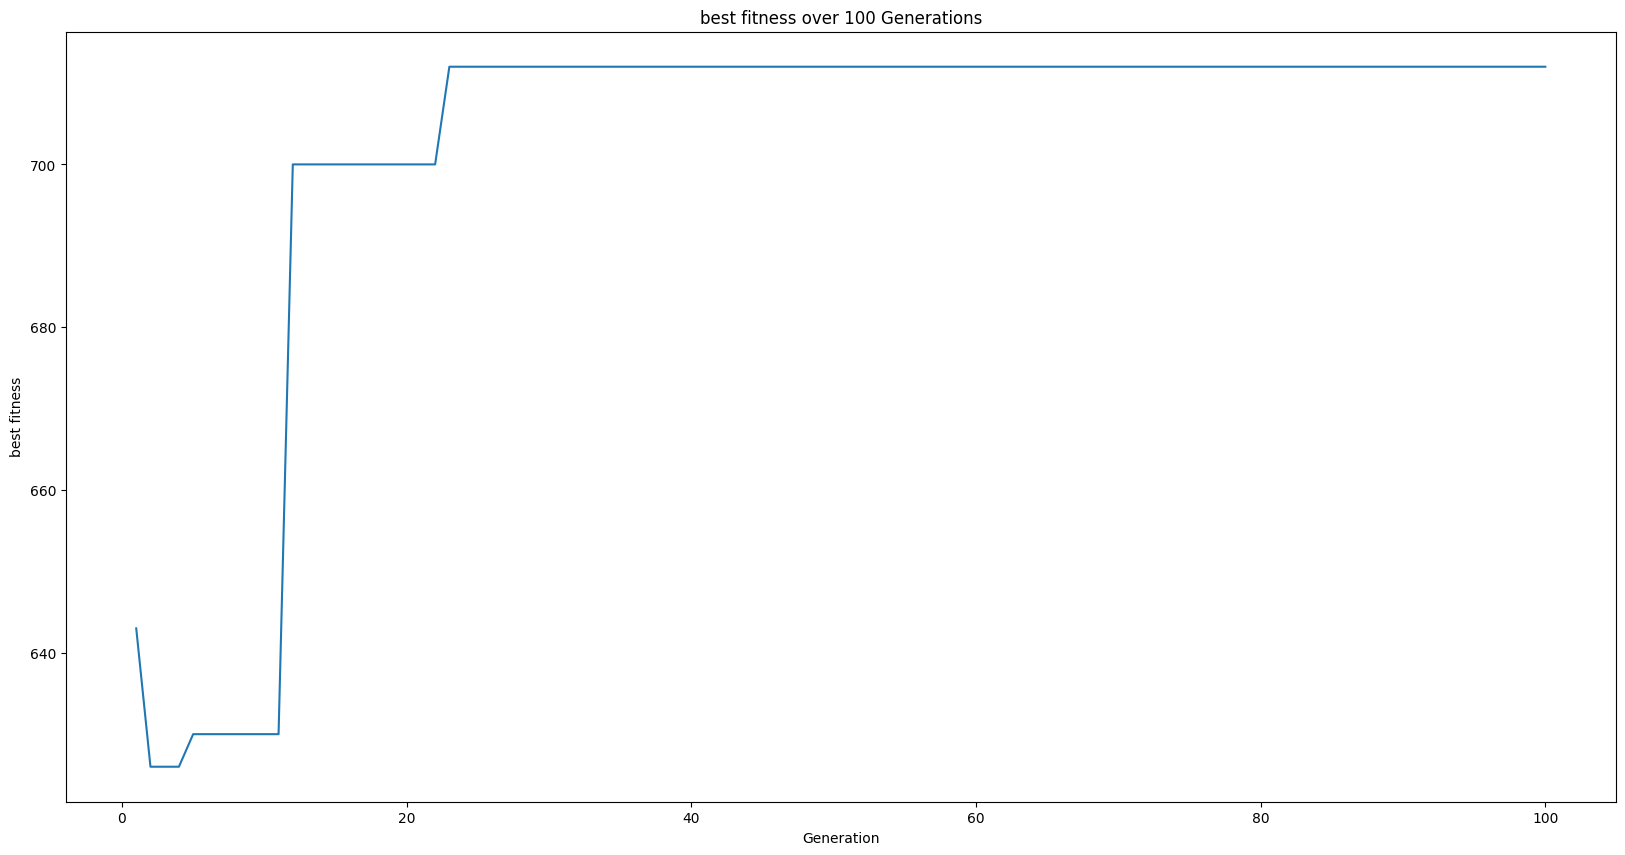

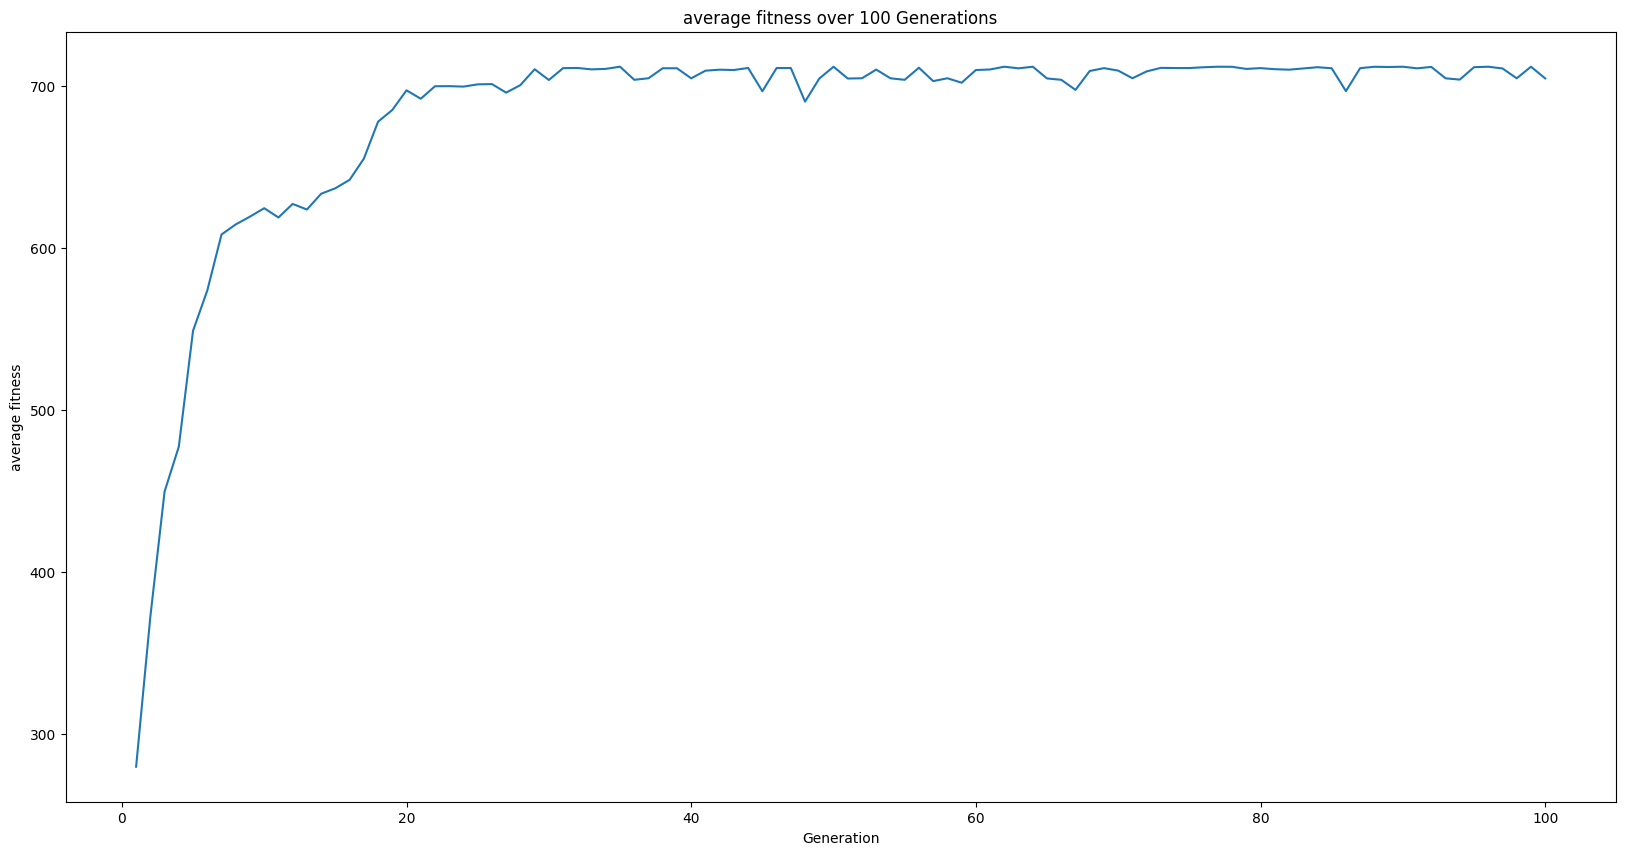

Can't reach the limit threshold (760)


In [ ]:
random.seed(42)
last_population_1_4_low, best_individual_1_4_low = run_genetic_algorithm_original(population, num_generations)
plot_best_fit(best_fitness_standard, num_generations)  
plot_avg_fit(avg_fitness_standard, num_generations)
convergence_rate(best_fitness_standard, 760)

Tổng kết thí nghiệm 1.4

In [ ]:
#Tổng kết thí nghiệm 1.4
best_fit_ex_1_4 = []
best_fit_ex_1_4_low = []

for i in range(30): #Ban đầu nhóm để 100 nhưng mà nó chạy lâu quá nên nhóm để nó xuống 30 thôi cho chạy nhanh nhanh.
  last_population_1_4, best_individual_1_4 = run_genetic_algorithm_original(population, num_generations)
  best_fit_ex_1_4.append(fitness(best_individual_1_4))
  last_population_1_4_low, best_individual_1_4_low = run_genetic_algorithm_original(population, num_generations)
  best_fit_ex_1_4_low.append(fitness(best_individual_1_4_low))
  clear_output()

**Nhận xét thí nghiệm 1.4** - Việc đẩy tỉ lệ lai tạo lên cao cũng có thể gây ra sự hội tụ sớm hoặc mất các cá thể tốt. Ngoài ra, tỷ lệ lai ghép cao cũng có thể tăng nguy cơ tạo ra các thế hệ con có sức khỏe thấp, ảnh hưởng tiêu cực đến chất lượng của quần thể. Nhưng nhìn chung thì cũng không tệ bằng cái đẩy đột biến lên cao, nhìn chung việc đẩy đột biến lên cao tạo ra ảnh hưởng tương đối tồi đối với sức khỏe của toàn quần thể. 

**Tổng kết thí nghiệm 1 - Balance population**

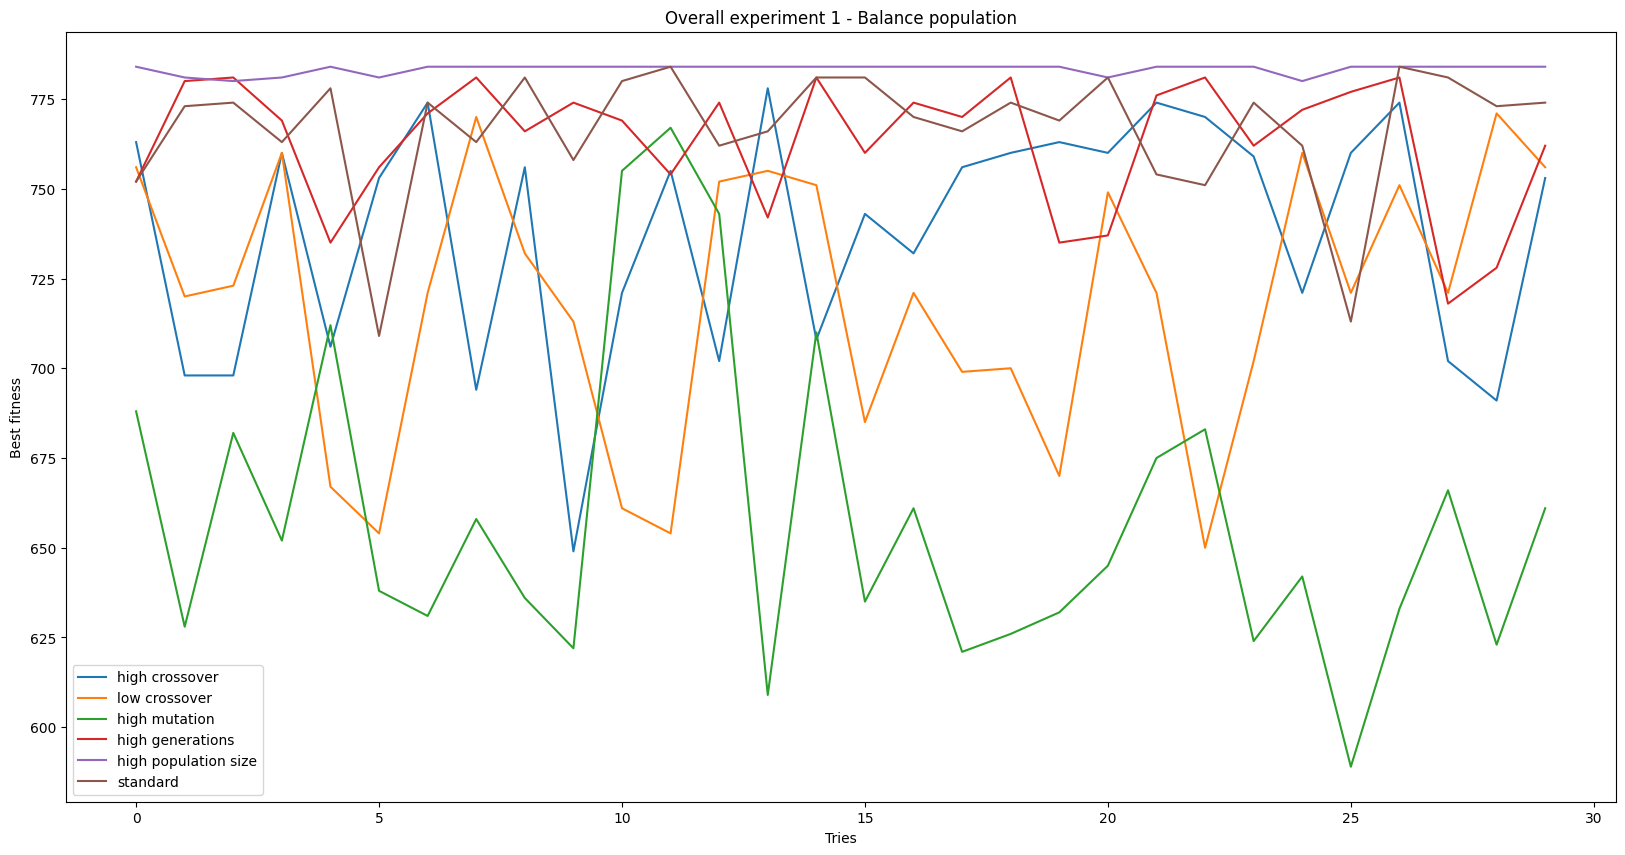

In [ ]:
import matplotlib.pyplot as plt

test_time = list(range(30))

fig = plt.figure(figsize=(20, 10))

plt.plot(test_time, best_fit_ex_1_4, label='high crossover')
plt.plot(test_time, best_fit_ex_1_4_low, label='low crossover')
plt.plot(test_time, best_fit_ex_1_3, label='high mutation')
plt.plot(test_time, best_fit_ex_1_2, label='high generations')
plt.plot(test_time, best_fit_ex_1_1, label='high population size')
plt.plot(test_time, best_fit_ex_1_0, label='standard')

plt.legend()
plt.xlabel('Tries')
plt.ylabel('Best fitness')
plt.title('Overall experiment 1 - Balance population')

plt.show()


**Thí nghiệm 2**
---
Ảnh hưởng của các toán tử đột biến tới kết quả của thuật toán - Giả định quần thể khởi tạo là cân bằng. 


In [ ]:
#Quay về tham số như ban đầu 
#Import module
import random
import time
#Tham số cho GA
population_size = 100
mutation_rate = 0.001
crossover_rate = 0.5
num_generations = 100
values
weights
capacity
num_items = 20

2.1 Ảnh hưởng của hàm chọn lên kết quả của thuật toán - Ranking VS Tournament VS Wheel 

In [ ]:
#Hàm chọn theo kiểu bánh xe roulete
def selection_wheel(population):
        fitnesses = [fitness(individual) for individual in population]
        total_fitness = sum(fitnesses)
        probabilities = [fitness / total_fitness for fitness in fitnesses]
        cumulative_probabilities = [sum(probabilities[:i+1]) for i in range(len(probabilities))]
        new_population = []
        for i in range(len(population)):
            random_value = random.random()
            for j in range(len(cumulative_probabilities)):
                if random_value < cumulative_probabilities[j]:
                    new_population.append(population[j])
                    break
        return new_population

In [ ]:
#Hàm chọn theo kiểu rank
def selection_rank(population):
    fitnesses = [fitness(individual) for individual in population]
    ranked_indices = list(reversed(sorted(range(len(fitnesses)), key=lambda k: fitnesses[k])))
    ranks = [0] * len(ranked_indices)
    for i, index in enumerate(ranked_indices):
        ranks[index] = i + 1
    total_ranks = sum(ranks)
    probabilities = [rank / total_ranks for rank in ranks]
    cumulative_probabilities = [sum(probabilities[:i+1]) for i in range(len(probabilities))]
    new_population = []
    for i in range(len(population)):
        random_value = random.random()
        for j in range(len(cumulative_probabilities)):
            if random_value < cumulative_probabilities[j]:
                new_population.append(population[ranked_indices[j]])
                break
    return new_population

In [ ]:
best_fitness_wheel = []
avg_fitness_wheel = []


def run_genetic_algorithm_2_1_wheel(initial_population, max_generations):
  population = initial_population.copy()

  best_fit = []
  avg_fit = []
  for generation in range(num_generations):
        #Xác định individual có fitness tốt nhất trong mỗi thế hệ
        best_individual = max(population, key=fitness)
        best_fit.append(best_individual)
        #Xác định giá trị fitness trung bình trong quần thể trong mỗi thế hệ
        fit_values = [fitness(i) for i in population]
        mean_fit = mean(fit_values)
        avg_fit.append(mean_fit)
        population = selection_wheel(population)
        offspring_population = []
        for i in range(population_size):
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child = crossover_singlepoint(parent1, parent2, crossover_rate = crossover_rate)
            child = mutate_bitflip(child)
            offspring_population.append(child)
        population = offspring_population

  X = best_fit
  global best_fitness_wheel
  best_fitness_wheel = X.copy()  
  Y = avg_fit
  global avg_fitness_wheel
  avg_fitness_wheel = Y.copy()

  best_individual = max(population, key=fitness)
  print("=======================================================================================")
  print("The exact solutions for knapsack is: ", correct_ans)
  print("Maximum values of knapsack is: ", best_fitness)
  print("Maximum weight of knapsack is: ", capacity)
  print("=======================================================================================")
  print("Best individual in population in final generation:", best_individual)
  print("Best fitness in population in final generation:", fitness(best_individual))
  print("Weights of the best individual: ", weight(best_individual))
  print("=======================================================================================")

  return population, best_individual

In [ ]:
best_fitness_ranking = []
avg_fitness_ranking = []

def run_genetic_algorithm_2_1_ranking(initial_population, max_generations):
  population = initial_population.copy()
  
  best_fit = []
  avg_fit = []
  for generation in range(num_generations):
        #Xác định individual có fitness tốt nhất trong mỗi thế hệ
        best_individual = max(population, key=fitness)
        best_fit.append(best_individual)
        #Xác định giá trị fitness trung bình trong quần thể trong mỗi thế hệ
        fit_values = [fitness(i) for i in population]
        mean_fit = mean(fit_values)
        avg_fit.append(mean_fit)
        population = selection_rank(population)
        offspring_populations = []
        for i in range(population_size):
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child = crossover_singlepoint(parent1, parent2, crossover_rate = crossover_rate)
            child = mutate_bitflip(child)
            offspring_populations.append(child)
        population = offspring_populations

  X = best_fit
  global best_fitness_ranking
  best_fitness_ranking = X.copy()  
  Y = avg_fit
  global avg_fitness_ranking
  avg_fitness_ranking = Y.copy()

  best_individual = max(population, key=fitness)
  print("=======================================================================================")
  print("The exact solutions for knapsack is: ", correct_ans)
  print("Maximum values of knapsack is: ", best_fitness)
  print("Maximum weight of knapsack is: ", capacity)
  print("=======================================================================================")
  print("Best individual in population in final generation:", best_individual)
  print("Best fitness in population in final generation:", fitness(best_individual))
  print("Weights of the best individual: ", weight(best_individual))
  print("=======================================================================================")

  return population, best_individual

In [ ]:
#Su dung roulette wheel selection
random.seed(42)
last_population_2_1_wheel, best_individual_2_1_wheel = run_genetic_algorithm_2_1_wheel(population,num_generations)

The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
Best fitness in population in final generation: 715
Weights of the best individual:  130


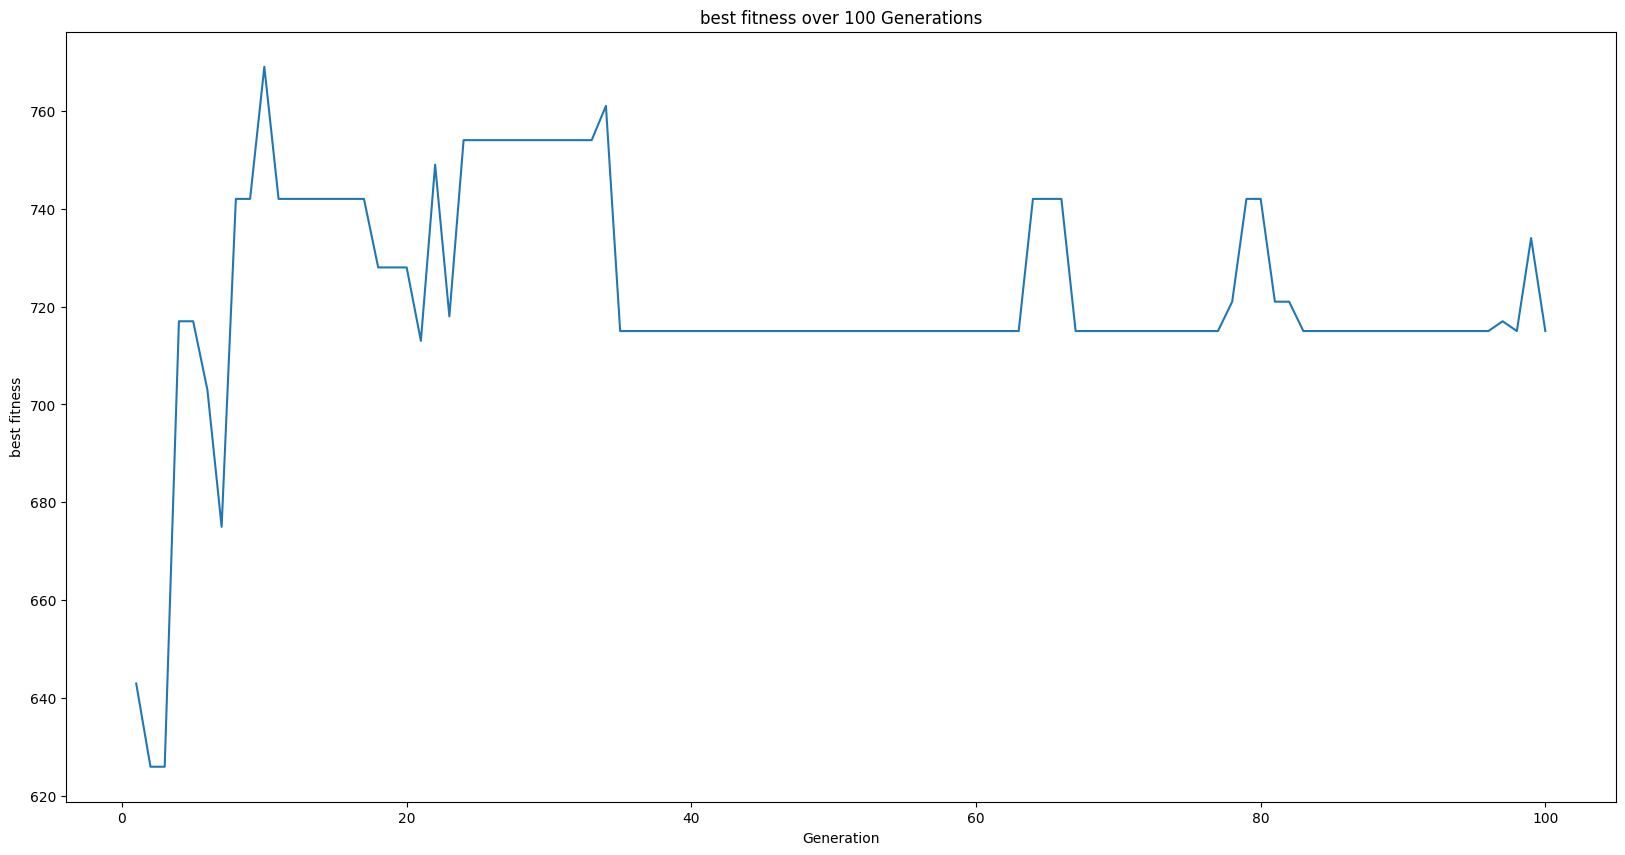

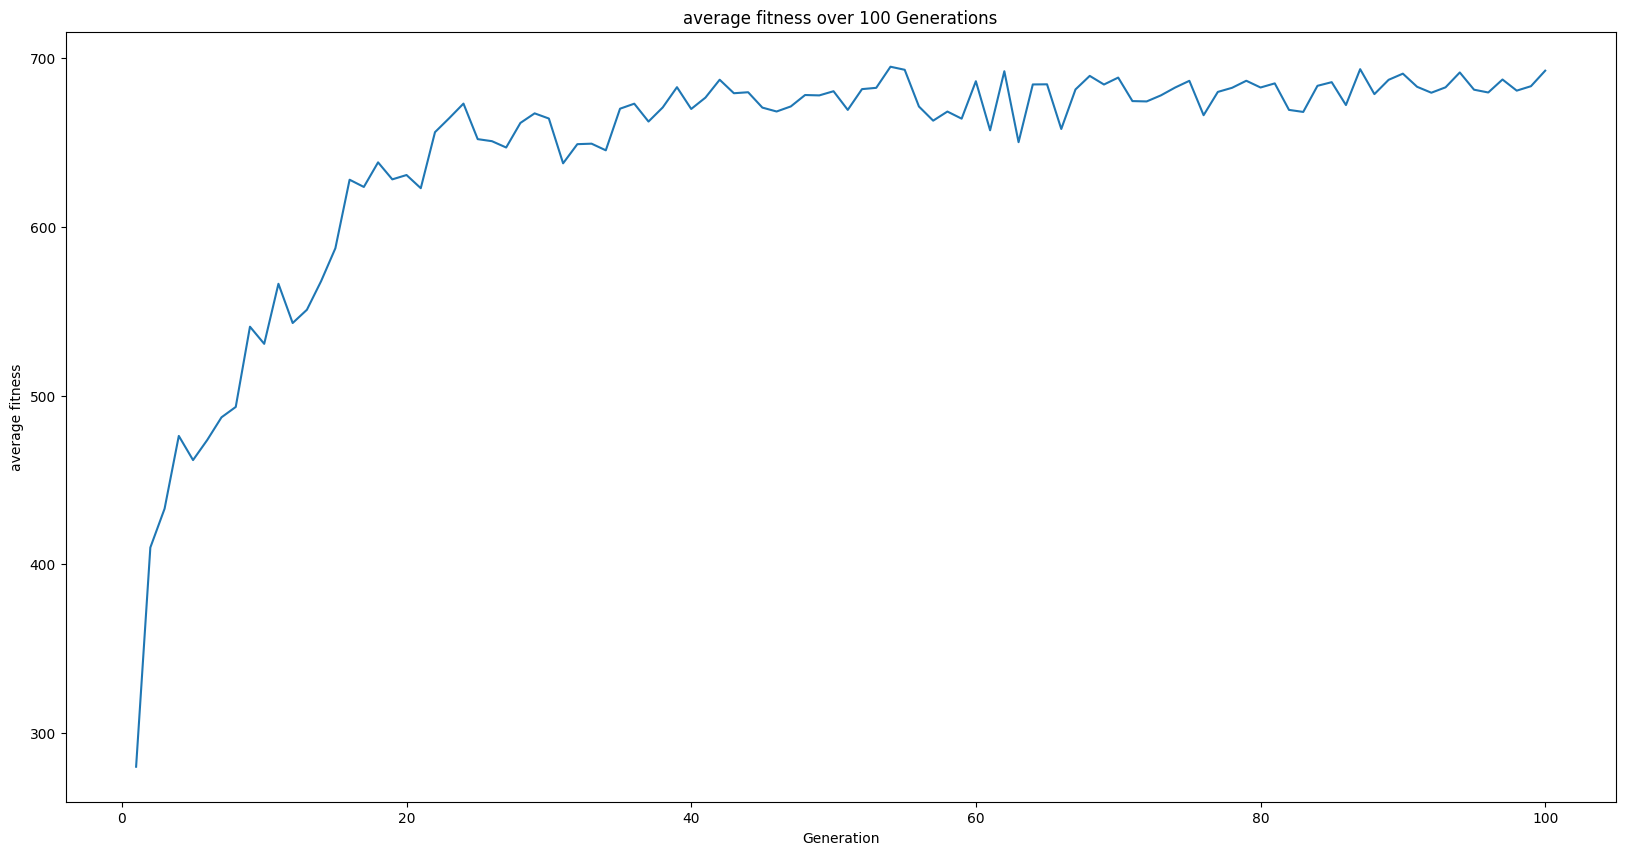

In [ ]:
plot_best_fit(best_fitness_wheel, num_generations)
plot_avg_fit(avg_fitness_wheel, num_generations)

In [ ]:
random.seed(42)
#Su dung ranking selection
last_population_2_1_rank, best_individual_2_1_rank = run_genetic_algorithm_2_1_ranking(population, num_generations)

The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1]
Best fitness in population in final generation: 645
Weights of the best individual:  124


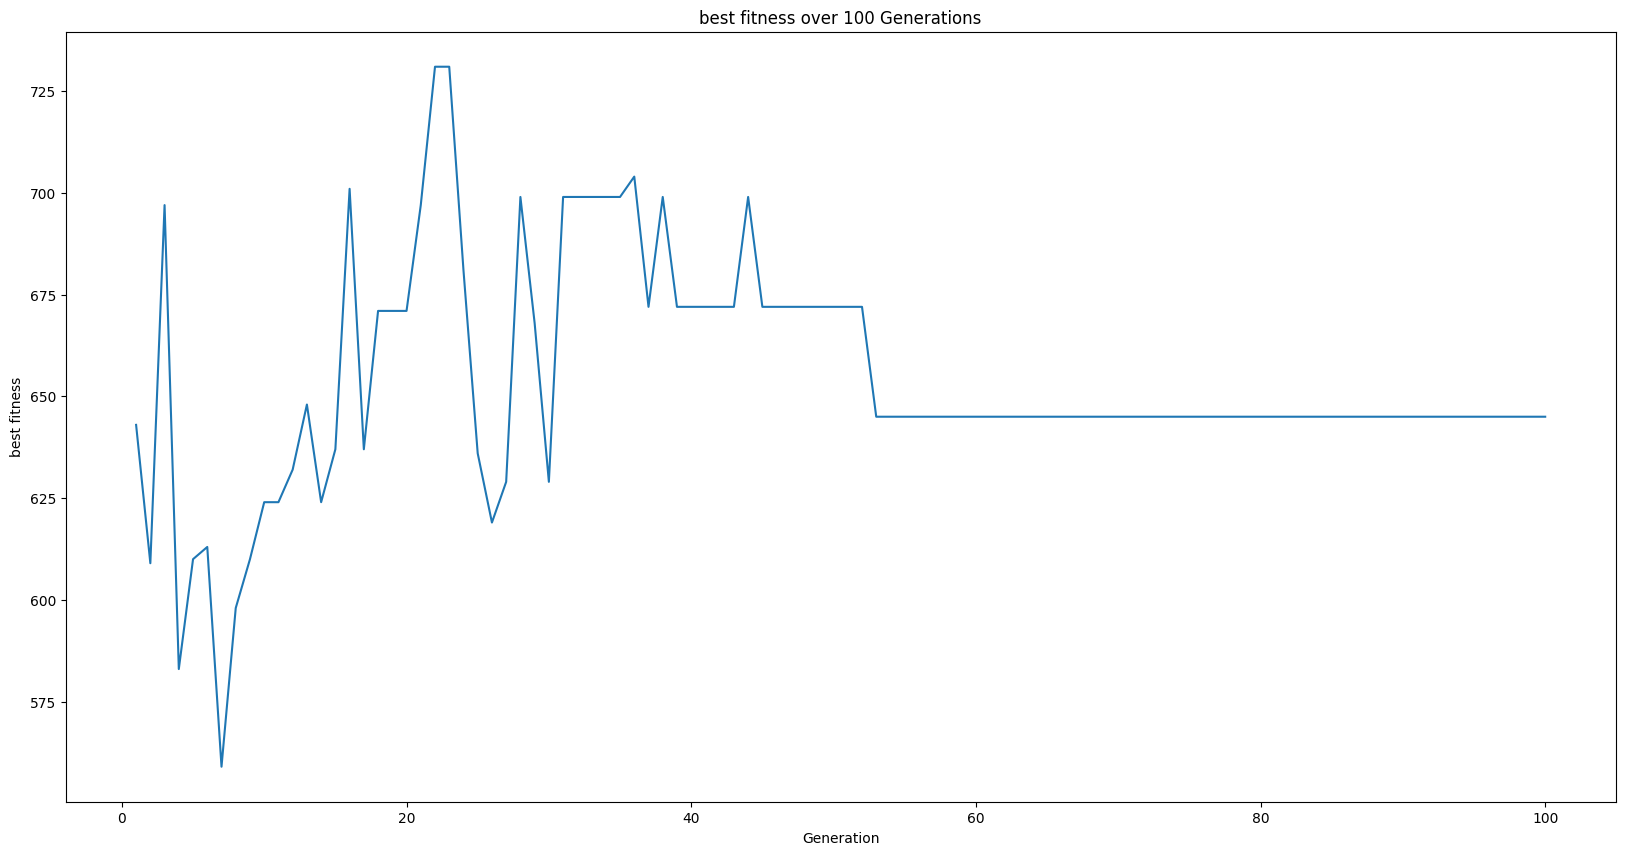

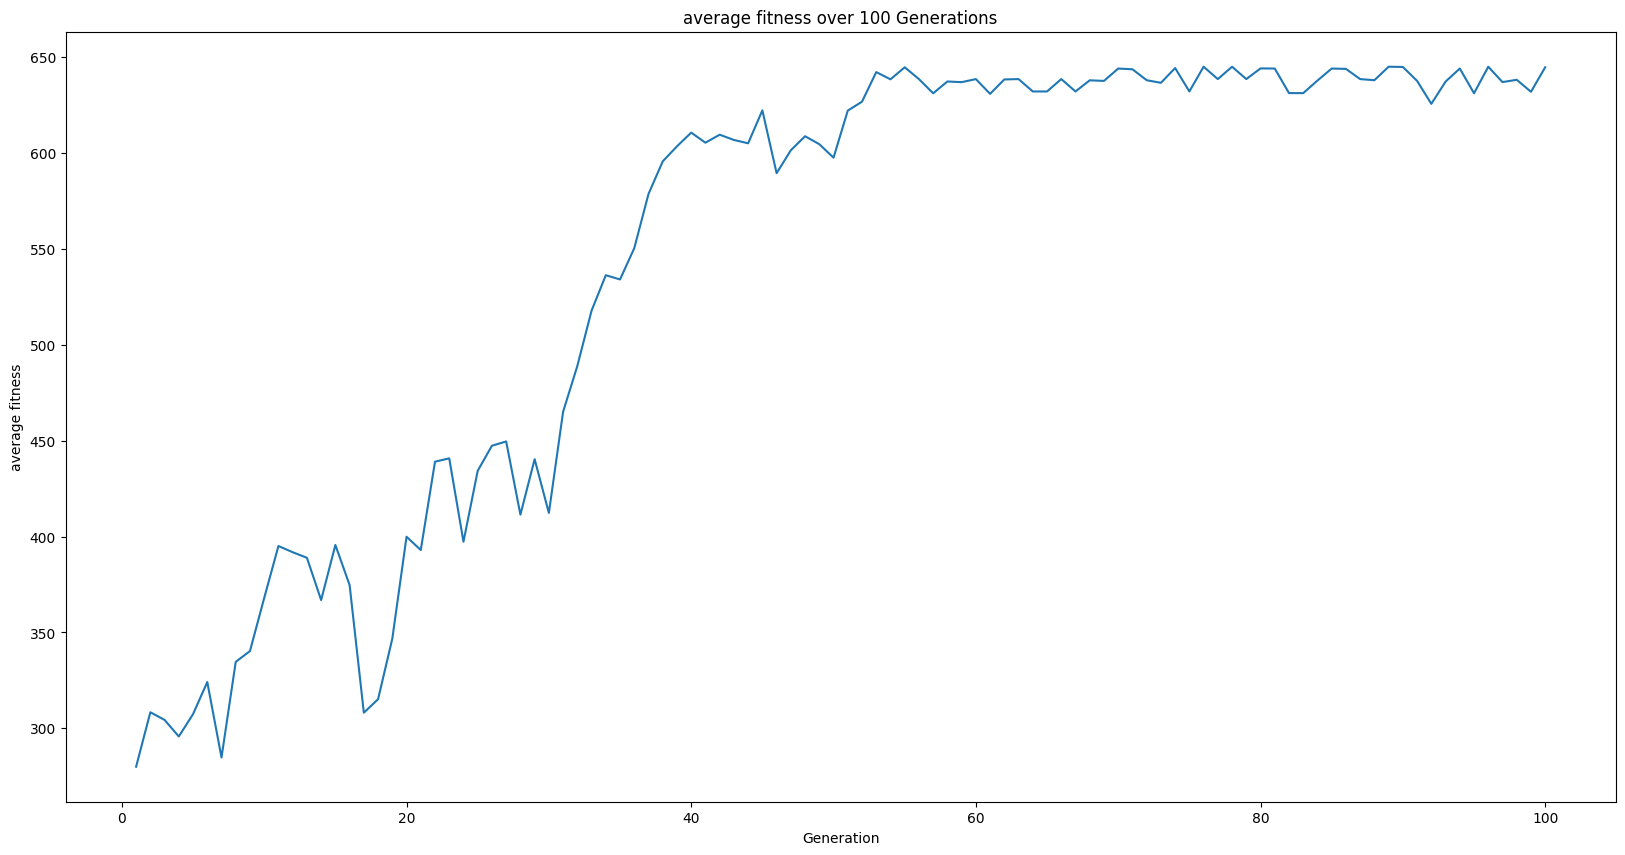

In [ ]:
plot_best_fit(best_fitness_ranking, num_generations)  
plot_avg_fit(avg_fitness_ranking, num_generations)

Tổng kết thí nghiệm 2.1


In [ ]:
random.seed(42)
#Tổng kết thí nghiệm 2.1
best_fit_ex_2_1_wheel = []
best_fit_ex_2_1_ranking = []
for i in range(30): #Ban đầu nhóm để 100 nhưng mà nó chạy lâu quá nên nhóm để nó xuống 30
  last_population_2_1_wheel, best_individual_2_1_wheel = run_genetic_algorithm_2_1_wheel(population, num_generations)
  best_fit_ex_2_1_wheel.append(fitness(best_individual_2_1_wheel))
  last_population_2_1_ranking, best_individual_2_1_ranking = run_genetic_algorithm_2_1_ranking(population, num_generations)
  best_fit_ex_2_1_ranking.append(fitness(best_individual_2_1_ranking))
  clear_output()

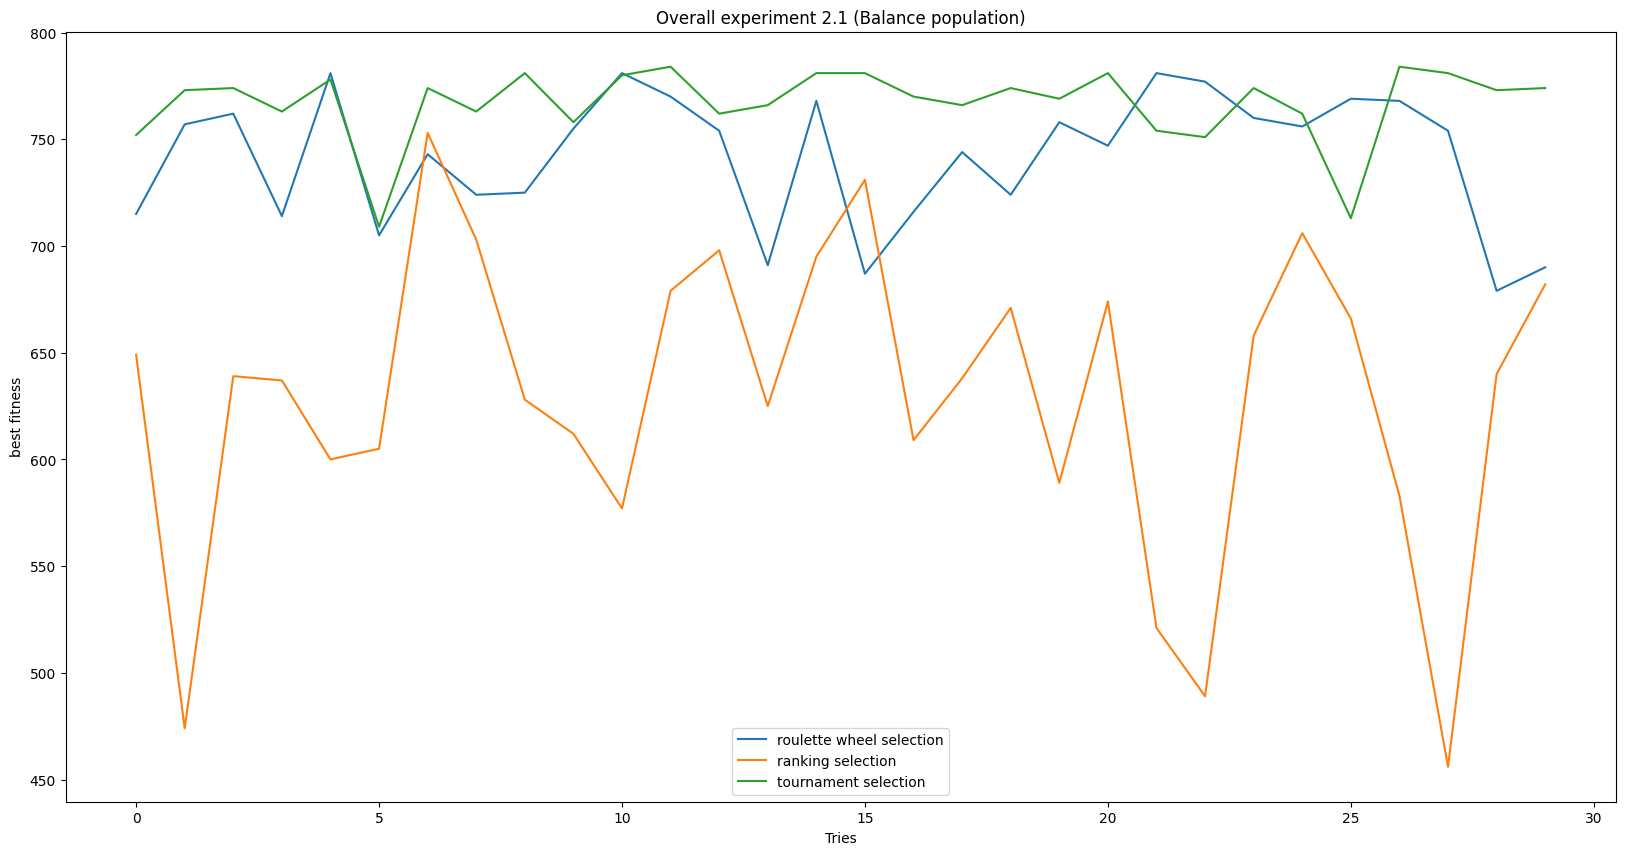

In [ ]:
  import matplotlib.pyplot as plt
  test_time = list(range(30))
  plt.figure(figsize=(20,10))
  plt.plot(test_time, best_fit_ex_2_1_wheel, label='roulette wheel selection')
  plt.plot(test_time, best_fit_ex_2_1_ranking, label='ranking selection')
  plt.plot(test_time, best_fit_ex_1_0, label='tournament selection')
  plt.legend()
  plt.xlabel('Tries')
  plt.ylabel('best fitness')
  plt.title('Overall experiment 2.1 (Balance population)')
  plt.show()

**Nhận xét thí nghiệm 2.1** - Qua thực nghiệm, nhóm nhận thấy với các thông số tiêu chuẩn, thì hàm chọn theo kiểu đấu trường nhìn chung cho ra kết quả tốt hơn so với hàm chọn theo kiểu bánh xe roulette, và tốt hơn nhiều so với hàm chọn theo kiểu xếp hạng. Lưu ý rằng nhóm đang thực nghiệm theo kiểu quần thể được khởi tạo là quần thể cân bằng. 

2.2 Ảnh hưởng của hàm lai tạo lên kết quả của thuật toán - Sử dụng hàm lai tạo 2 điểm. 

In [ ]:
#Trả lại hàm chọn như cũ:
#Hàm chọn theo kiểu đấu trường
def selection_tournament(population, tournament_size):
      offspring_population = []
      for i in range(len(population)):
        competitors = random.sample(population, tournament_size)
        winner = max(competitors, key=lambda individual: fitness(individual))
        offspring_population.append(winner)
      return offspring_population

In [ ]:
#Hàm theo kiểu double point crossover
def crossover_doublepoint(parent1, parent2, crossover_rate):

    # sChon ngau nhien 2 diem lai tao
    point1 = random.randint(0, len(parent1)-1)
    point2 = random.randint(0, len(parent1)-1)
    if point2 < point1:
        point1, point2 = point2, point1
    
    # Tao ra ca the con tu ca the phu huynh
    child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
    #child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
    
    return child1#, child2


In [ ]:
best_fitness_double_cross = []
avg_fitness_double_cross = []
tournament_size = 2
def run_genetic_algorithm_doublecross(initial_population, max_generations):
  population = initial_population.copy()
  best_fit = []
  avg_fit = []
  for generation in range(num_generations):
        #Xác định individual có fitness tốt nhất trong mỗi thế hệ
        best_individual = max(population, key=fitness)
        best_fit.append(best_individual)
        #Xác định giá trị fitness trung bình trong quần thể trong mỗi thế hệ
        fit_values = [fitness(i) for i in population]
        mean_fit = mean(fit_values)
        avg_fit.append(mean_fit)
        population = selection_tournament(population, tournament_size = tournament_size)
        offspring_population = []
        for i in range(population_size):
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child1 = crossover_doublepoint(parent1, parent2, crossover_rate = crossover_rate)
            child1 = mutate_bitflip(child1)
            offspring_population.append(child1)
        population = offspring_population

  X = best_fit
  global best_fitness_double_cross
  best_fitness_double_cross = X.copy()  
  Y = avg_fit
  global avg_fitness_double_cross
  avg_fitness_double_cross = Y.copy()

  best_individual = max(population, key=fitness)
  print("=======================================================================================")
  print("The exact solutions for knapsack is: ", correct_ans)
  print("Maximum values of knapsack is: ", best_fitness)
  print("Maximum weight of knapsack is: ", capacity)
  print("=======================================================================================")
  print("Best individual in population in final generation:", best_individual)
  print("Best fitness in population in final generation:", fitness(best_individual))
  print("Weights of the best individual: ", weight(best_individual))
  print("=======================================================================================")

  return population, best_individual

In [ ]:
avg_fitness_double_cross

[279.97,
 355.58,
 376.24,
 446.72,
 447.43,
 463.6,
 469.3,
 537.22,
 513.11,
 531.24,
 531.73,
 582.4,
 625.39,
 646.96,
 653.55,
 684.16,
 689.78,
 676.31,
 681.31,
 671.12,
 674.73,
 668.05,
 693.31,
 743.18,
 766.32,
 758.42,
 759.37,
 760.32,
 751.69,
 767.64,
 752.64,
 759.05,
 766.29,
 765.85,
 766.48,
 767.45,
 752.35,
 767.71,
 759.25,
 767.68,
 765.28,
 768,
 768,
 752.6,
 767.05,
 752.64,
 758.58,
 766.18,
 751.82,
 752.64,
 768,
 766.93,
 766.93,
 759.56,
 767.05,
 758.19,
 768,
 752.64,
 765.15,
 760,
 751.01,
 759.37,
 758.69,
 752.64,
 766.42,
 752.64,
 759.96,
 760.32,
 765.08,
 767.13,
 752.64,
 760.32,
 742.61,
 767.18,
 759.77,
 767.68,
 767.05,
 768,
 759.45,
 768,
 767.05,
 767.12,
 766.82,
 767.13,
 766.42,
 767.64,
 767.13,
 768,
 759.96,
 750.62,
 760.32,
 752.28,
 752.64,
 759.33,
 759.5,
 766.73,
 766.51,
 766.18,
 766.54,
 760.32]

The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0]
Best fitness in population in final generation: 768
Weights of the best individual:  125


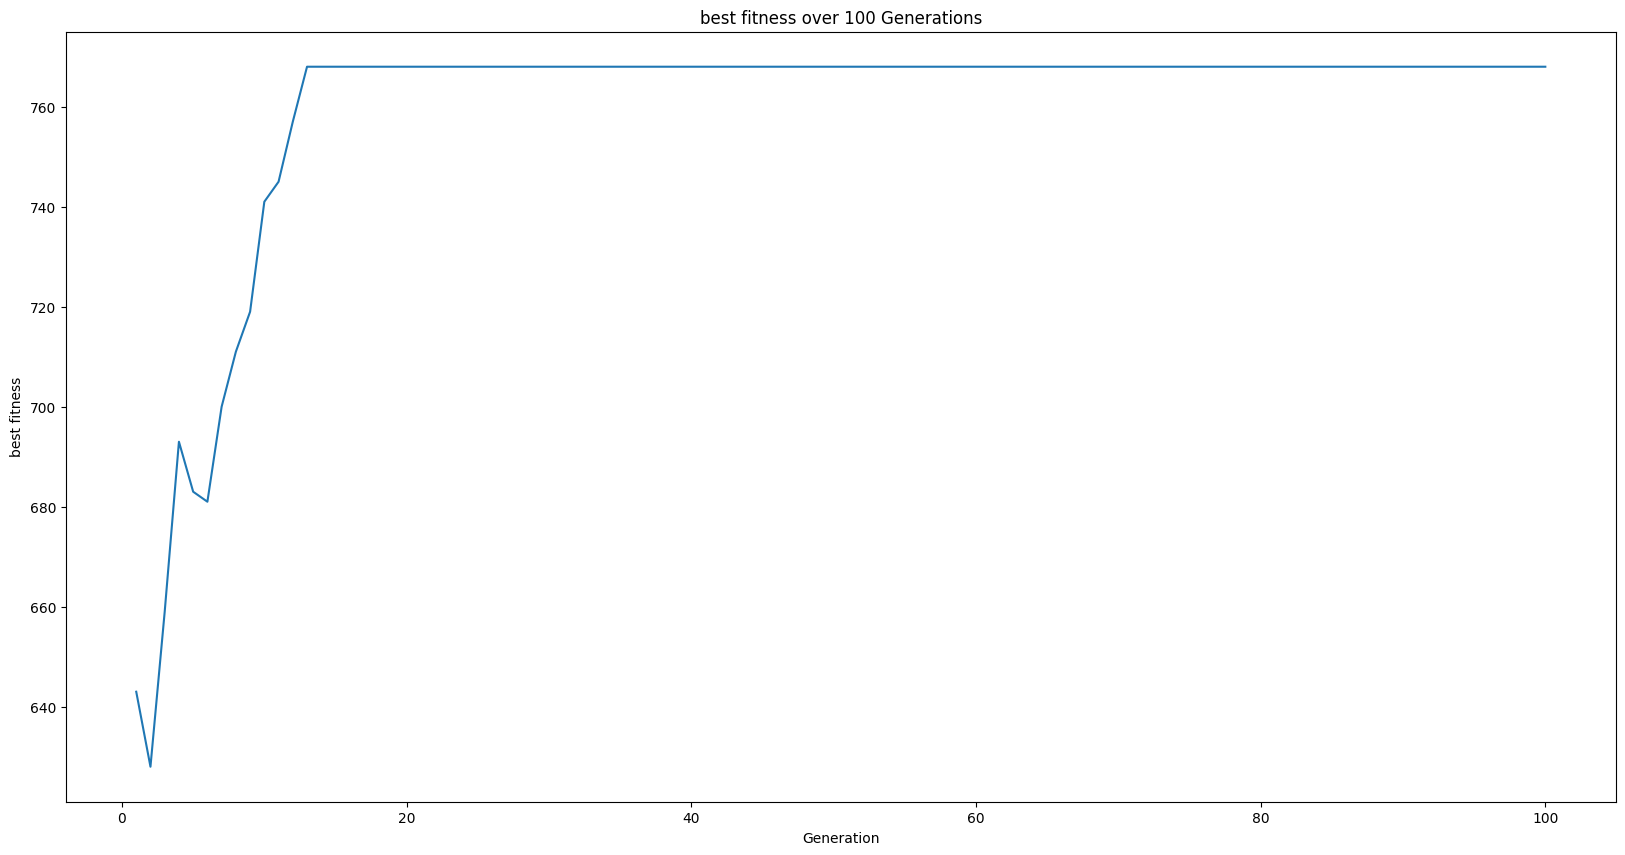

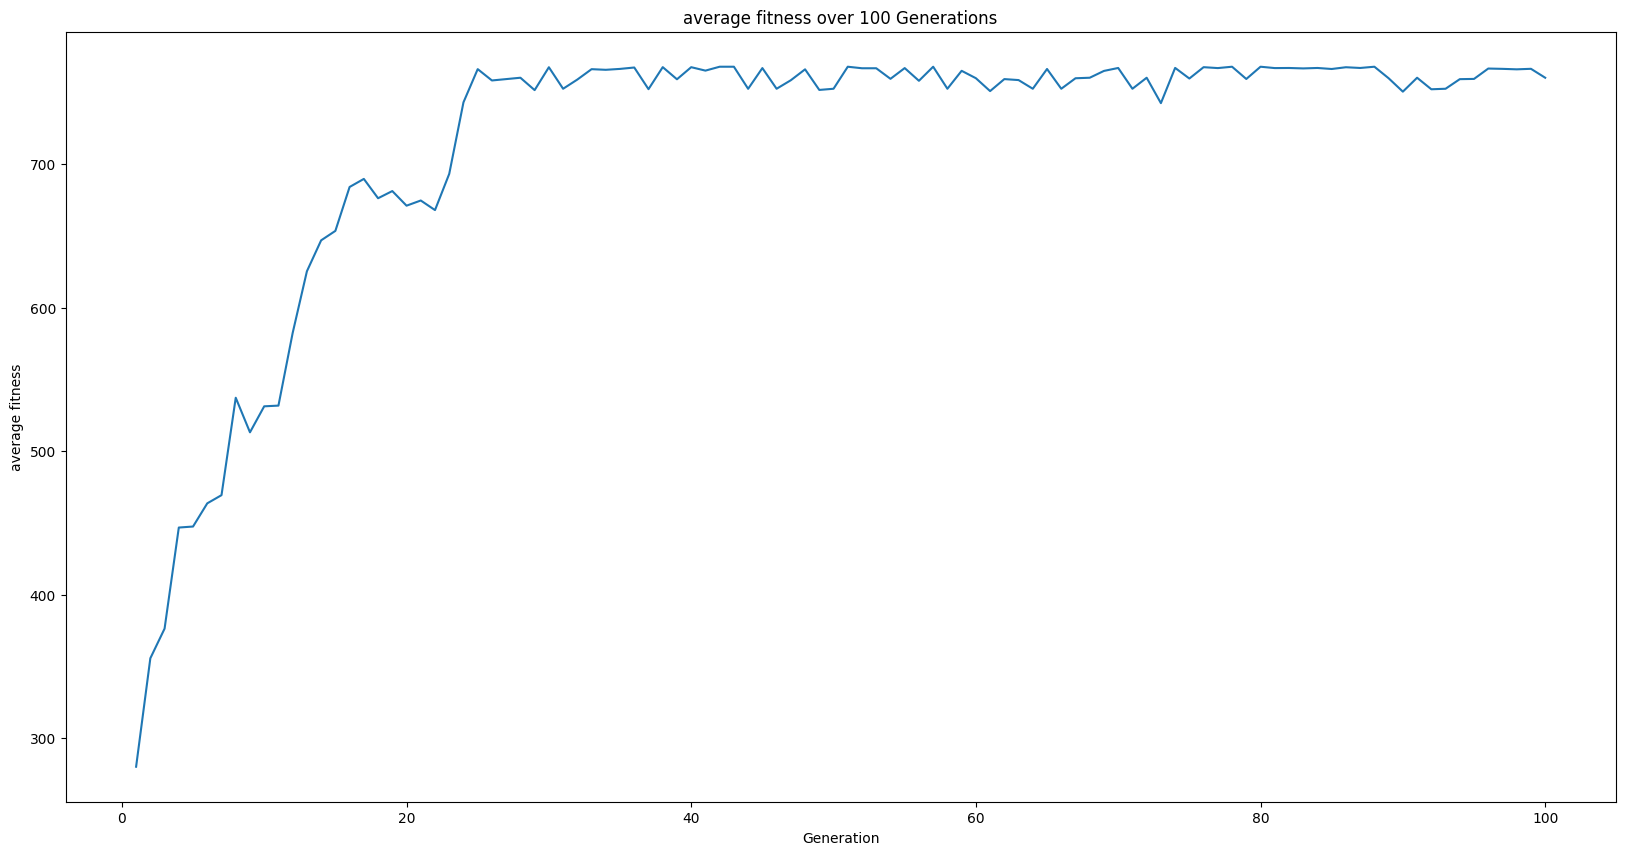

After 12 generations, we reached fitness's threshold (750)


In [ ]:
random.seed(42)
final_population_2_2_double, best_individual_crossover_double = run_genetic_algorithm_doublecross(population,num_generations)
plot_best_fit(best_fitness_double_cross, num_generations)  
plot_avg_fit(avg_fitness_double_cross, num_generations)  
convergence_rate(best_fitness_double_cross,750)

Tổng kết thí nghiệm 2.2

In [ ]:
random.seed(42)
#Tổng kết thí nghiệm 2.2
best_fit_ex_2_2_double = []
for i in range(30): #Ban đầu nhóm để 100 nhưng mà nó chạy lâu quá nên nhóm để nó xuống 30
  last_population_2_2_double, best_individual_2_2_double = run_genetic_algorithm_doublecross(population, num_generations)
  best_fit_ex_2_2_double.append(fitness(best_individual_2_2_double))

  clear_output()

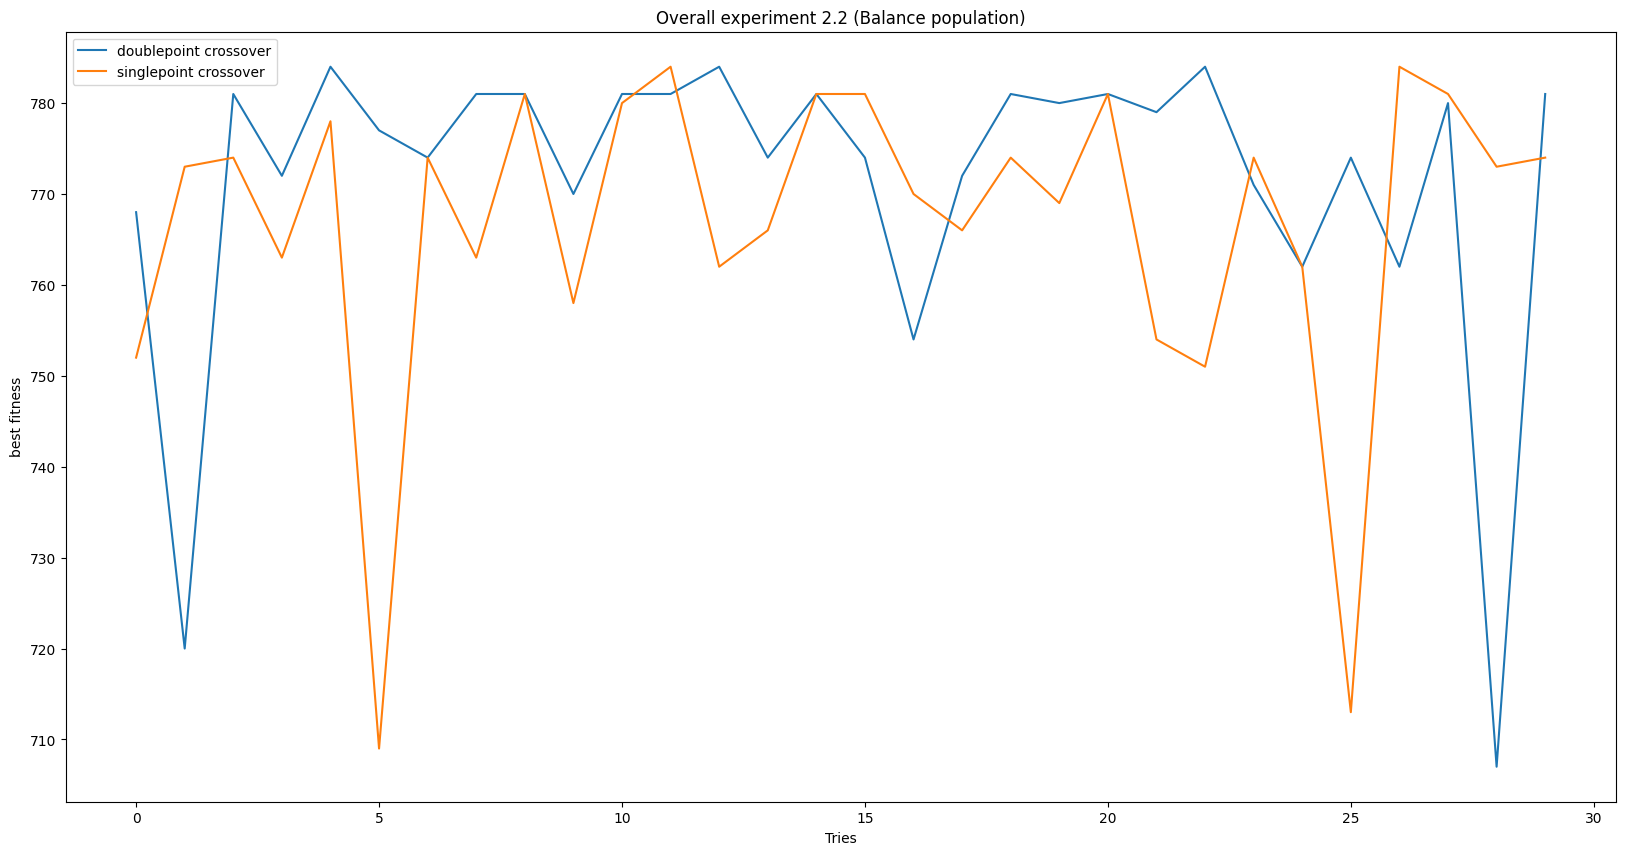

In [ ]:
  import matplotlib.pyplot as plt
  test_time = list(range(30))
  plt.figure(figsize=(20,10))
  plt.plot(test_time, best_fit_ex_2_2_double, label='doublepoint crossover')
  plt.plot(test_time, best_fit_ex_1_0, label='singlepoint crossover')
  plt.legend()
  plt.xlabel('Tries')
  plt.ylabel('best fitness')
  plt.title('Overall experiment 2.2 (Balance population)')
  plt.show()

**Nhận xét thí nghiệm 2.2** - Qua thực nghiệm, nhóm thấy rằng việc sử dụng double crossover point thay cho single crossover point (giữ nguyên các hàm khác không đổi) làm tăng tính đa dạng của cá thể con bởi vì nhiều đoạn gen được trao đổi giữa cá thể cha và cá thể mẹ hơn. Lợi ích của cái này là nó sẽ dẫn đến sự hội tụ nhanh hơn đến giải pháp tối ưu nếu quần thể bị mắt kẹt ở cục bộ và bên cạnh đó cũng cho phép khám phá rộng hơn cái không gian tìm kiếm. Bên cạnh đó cái việc chọn các điểm crossover không tốt hoặc là cái crossover rate cao quá nó cũng gây ra hội tụ sớm hoặc mất cá thể tốt. Và nói chung lại thì 

2.3 Ảnh hưởng của các hàm đột biến tới hiệu quả của thuật toán - Sử dụng scramble mutation

In [ ]:
#Hàm đột biến kiểu scramble
def mutate_scramble(child):
    n = len(child)
    mutated_chromosome = child[:]
    
    for i in range(n):
        if random.random() < mutation_rate:
            subset_size = random.randint(1, n//2)
            subset_start = random.randint(0, n - subset_size)
            subset_end = subset_start + subset_size
            subset = mutated_chromosome[subset_start:subset_end]
            random.shuffle(subset)
            mutated_chromosome[subset_start:subset_end] = subset
    
    return mutated_chromosome


In [ ]:
best_fitness_scramble = []
avg_fitness_scramble = []
tournament_size = 2
def run_genetic_algorithm_scramble(initial_population, max_generations):
  population = initial_population.copy()
  best_fit = []
  avg_fit = []
  for generation in range(num_generations):
        #Xác định individual có fitness tốt nhất trong mỗi thế hệ
        best_individual = max(population, key=fitness)
        best_fit.append(best_individual)
        #Xác định giá trị fitness trung bình trong quần thể trong mỗi thế hệ
        fit_values = [fitness(i) for i in population]
        mean_fit = mean(fit_values)
        avg_fit.append(mean_fit)
        population = selection_tournament(population, tournament_size = tournament_size)
        offspring_population = []
        for i in range(population_size):
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child1 = crossover_singlepoint(parent1, parent2, crossover_rate = crossover_rate)
            child1 = mutate_scramble(child1)
            offspring_population.append(child1)
        population = offspring_population

  X = best_fit
  global best_fitness_scramble
  best_fitness_scramble = X.copy()  
  Y = avg_fit
  global avg_fitness_scramble
  avg_fitness_scramble = Y.copy()

  best_individual = max(population, key=fitness)
  print("=======================================================================================")
  print("The exact solutions for knapsack is: ", correct_ans)
  print("Maximum values of knapsack is: ", best_fitness)
  print("Maximum weight of knapsack is: ", capacity)
  print("=======================================================================================")
  print("Best individual in population in final generation:", best_individual)
  print("Best fitness in population in final generation:", fitness(best_individual))
  print("Weights of the best individual: ", weight(best_individual))
  print("=======================================================================================")

  return population, best_individual  

The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
Best fitness in population in final generation: 774
Weights of the best individual:  127


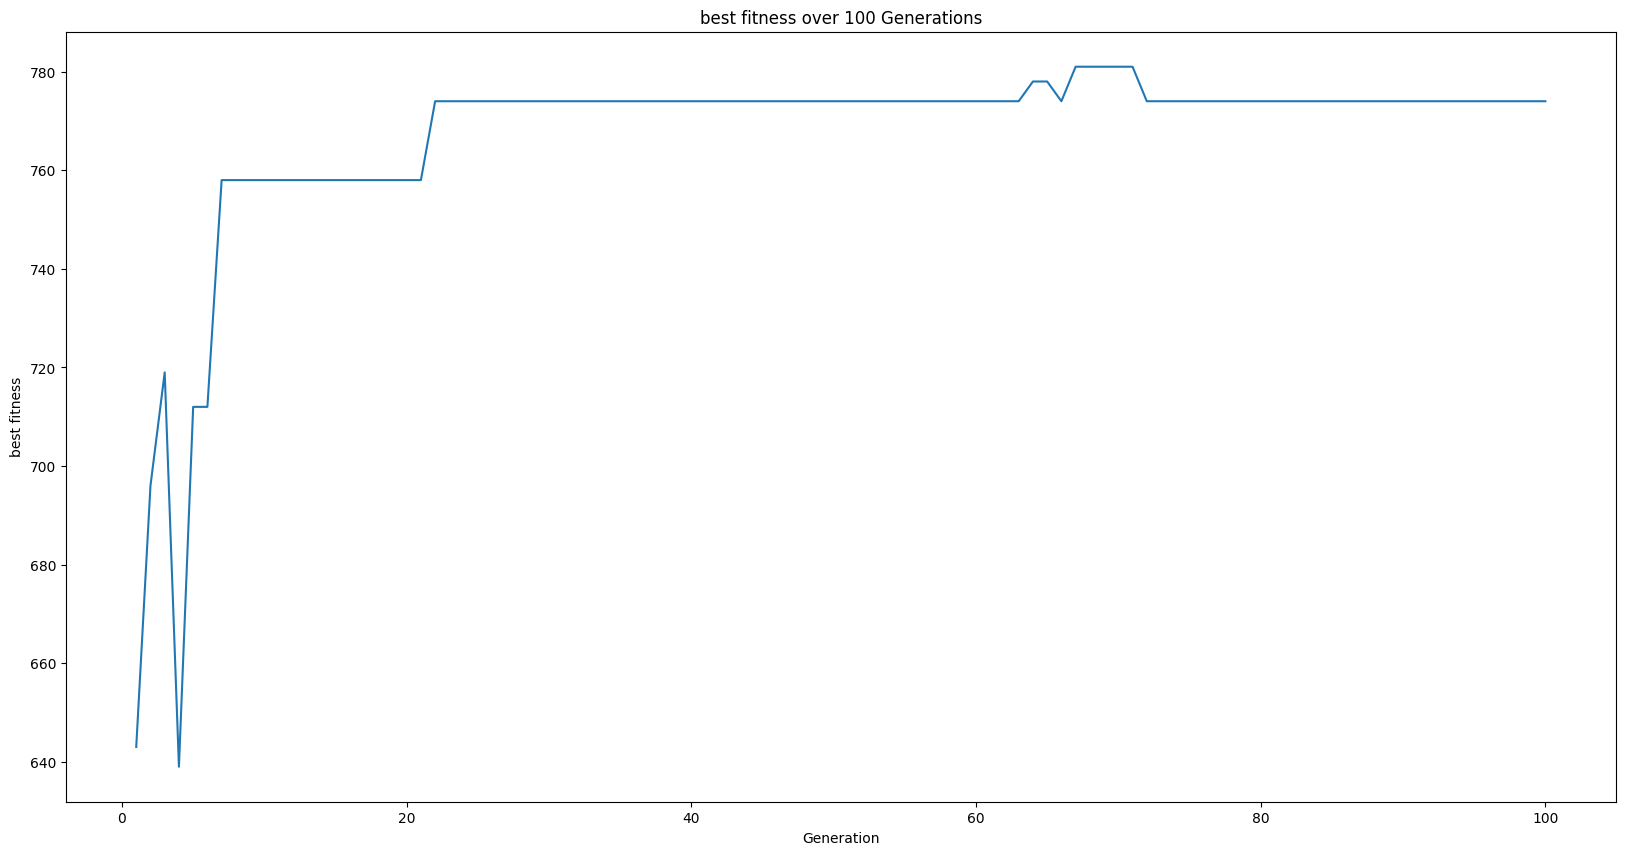

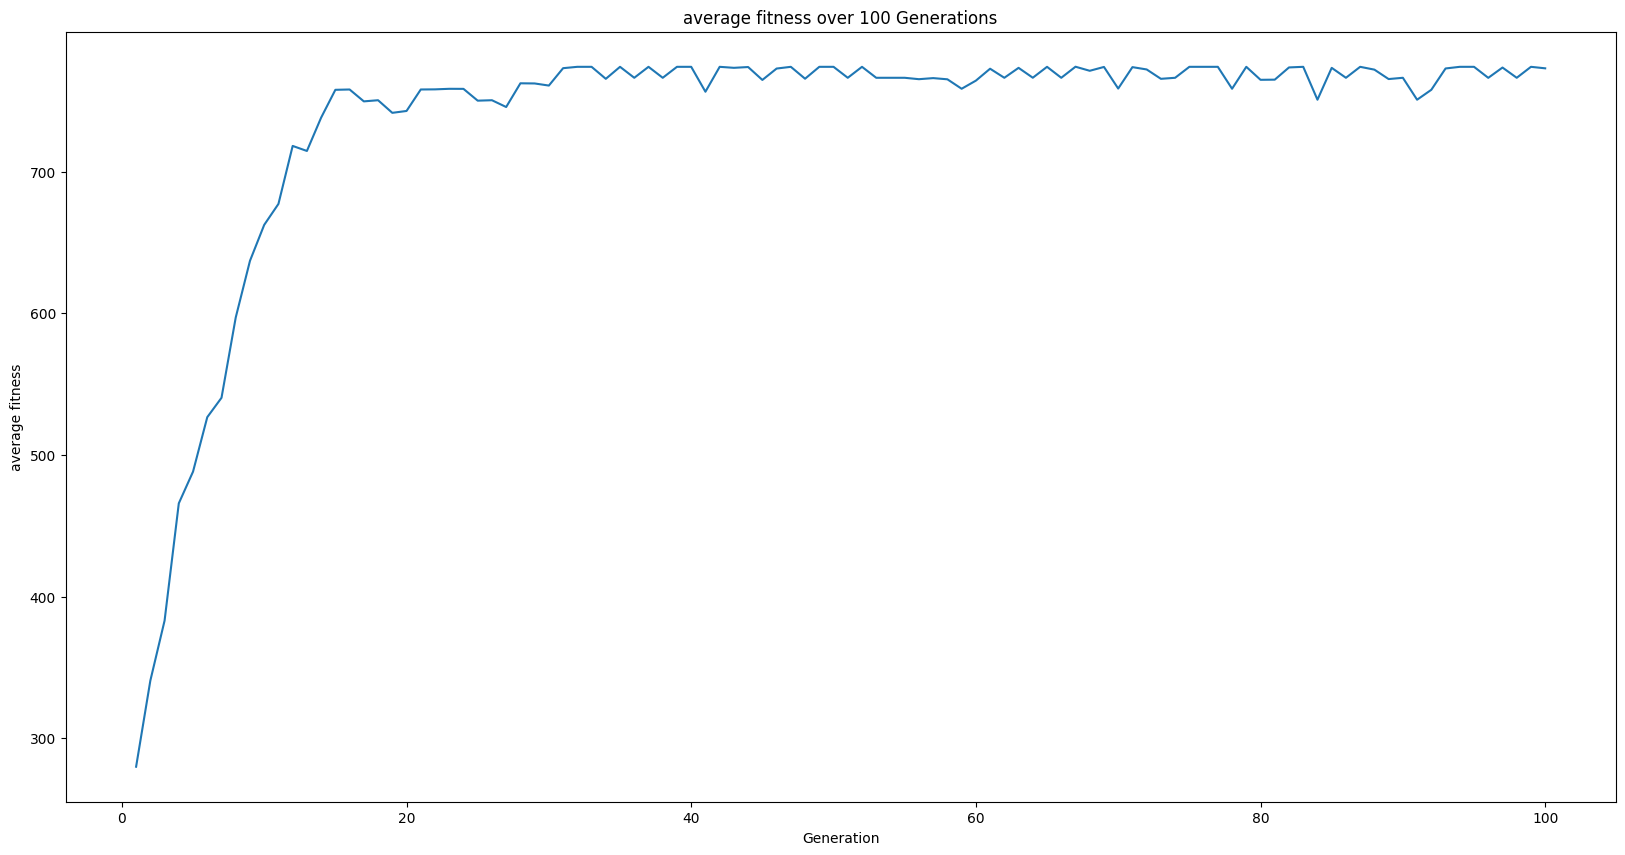

After 7 generations, we reached fitness's threshold (750)


In [ ]:
random.seed(42)
last_population_2_3_scramble, best_individual_2_3_scramble = run_genetic_algorithm_scramble(population, num_generations)
plot_best_fit(best_fitness_scramble, num_generations)
plot_avg_fit(avg_fitness_scramble, num_generations)
convergence_rate(best_fitness_scramble,750)

Tổng kết thí nghiệm 2.3

In [ ]:
random.seed(42)
#Tổng kết thí nghiệm 2.3
best_fit_ex_2_3_scramble = []

for i in range(30): #Ban đầu nhóm để 100 nhưng mà nó chạy lâu quá nên nhóm để nó xuống 30
  last_population_2_3_scramble, best_individual_2_3_scramble = run_genetic_algorithm_scramble(population, num_generations)
  best_fit_ex_2_3_scramble.append(fitness(best_individual_2_3_scramble))

  clear_output()

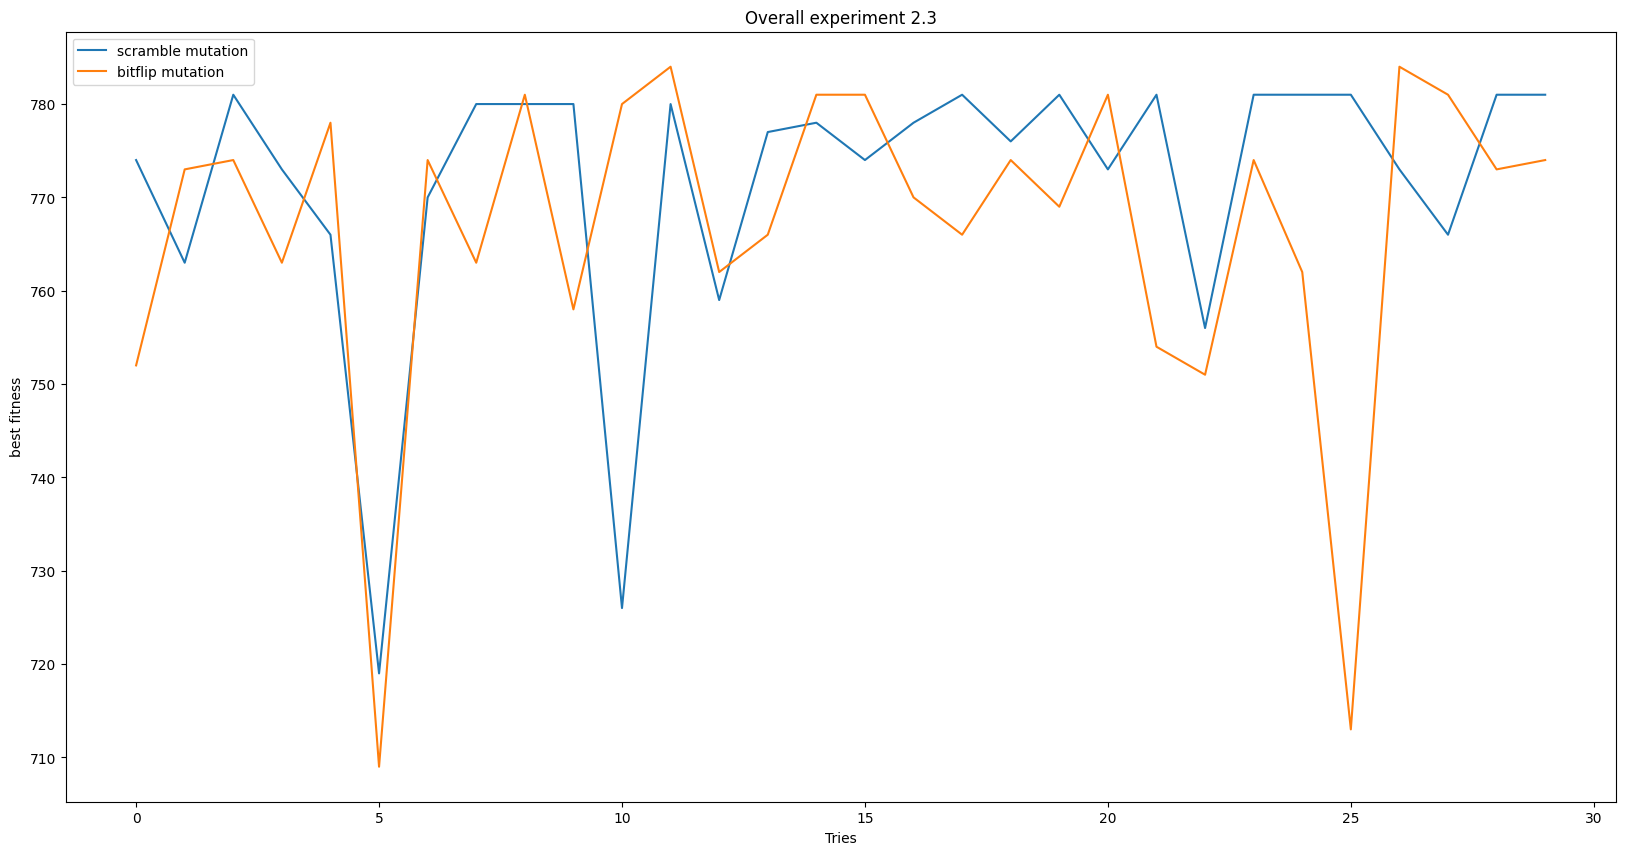

In [ ]:
  import matplotlib.pyplot as plt
  test_time = list(range(30))
  plt.figure(figsize=(20,10))
  plt.plot(test_time, best_fit_ex_2_3_scramble, label = 'scramble mutation')
  plt.plot(test_time, best_fit_ex_1_0, label = 'bitflip mutation')
  plt.legend()
  plt.xlabel('Tries')
  plt.ylabel('best fitness')
  plt.title('Overall experiment 2.3')
  plt.show()

**Nhận xét thí nghiệm 2.3** - Nhóm đã thực nghiệm nhiều lần và rút ra kết luận không thể dự đoán chính xác các thay đổi của best fitness tốt nhất trong mỗi thế hệ khi dùng đột biến kiểu scramble thay cho đột biến kiểu bit-flip. Nhưng nói chung, đột biến kiểu scramble có thể giới thiệu nhiều đa dạng hơn vào quần thể so với bit flip mutation bởi vì nó sắp xếp lại vị trí của các gene trong nhiễm sắc thể. Điều này có thể cho phép quần thể khám phá các khu vực mới của không gian tìm kiếm và thoát khỏi các điểm tối ưu cục bộ. Tuy nhiên, nếu tỷ lệ đột biến được đặt quá cao, scramble mutation có thể gây quá nhiều sự gián đoạn cho quần thể và dẫn đến mất đi các cá thể tốt.

**Thí nghiệm 3**
---
Các cách để có thể bảo toàn tính trạng tốt nhất của toàn bộ quần thể trong từng thế hệ - Giả định quần thể đang cân bằng


3.1 Hướng tiếp cận elitism 

In [ ]:
best_fitness_elitism = []
avg_fitness_elitism = []
tournament_size = 2
elitism = 2

def run_genetic_algorithm_elitism(initial_population, max_generations):
  population = initial_population.copy()
  best_fit_elitism = []
  avg_fit_elitism = []
  for generation in range(num_generations):
        #Xác định individual có fitness tốt nhất trong mỗi thế hệ
        sorted_list = sorted(population, key=fitness, reverse = True)
        best_individual = sorted_list[:elitism]
        best_fit_elitism.append(sorted_list[0])
        #Xác định giá trị fitness trung bình trong quần thể trong mỗi thế hệ
        fit_values = [fitness(i) for i in population]
        mean_fit = mean(fit_values)
        avg_fit_elitism.append(mean_fit)
        #print("Best individual in this population:", best_individual)
        #print("Best fitness in this population:", fitness(best_individual))
        population = selection_tournament(population, tournament_size)
        offspring_population = []
        for i in range(population_size - elitism):
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child = crossover_singlepoint(parent1, parent2, crossover_rate = crossover_rate)
            child = mutate_bitflip(child)
            offspring_population.append(child)
        population = offspring_population + best_individual

  G = best_fit_elitism
  global best_fitness_elitism
  best_fitness_elitism = G.copy()  
  H = avg_fit_elitism
  global avg_fitness_elitism
  avg_fitness_elitism = H.copy()

  best_individual = max(population, key=fitness)
  print("=======================================================================================")
  print("The exact solutions for knapsack is: ", correct_ans)
  print("Maximum values of knapsack is: ", best_fitness)
  print("Maximum weight of knapsack is: ", capacity)
  print("=======================================================================================")
  print("Best individual in population in final generation:", best_individual)
  print("Best fitness in population in final generation:", fitness(best_individual))
  print("Weights of the best individual: ", weight(best_individual))
  print("=======================================================================================")

  return population, best_individual

The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
Best fitness in population in final generation: 774
Weights of the best individual:  127


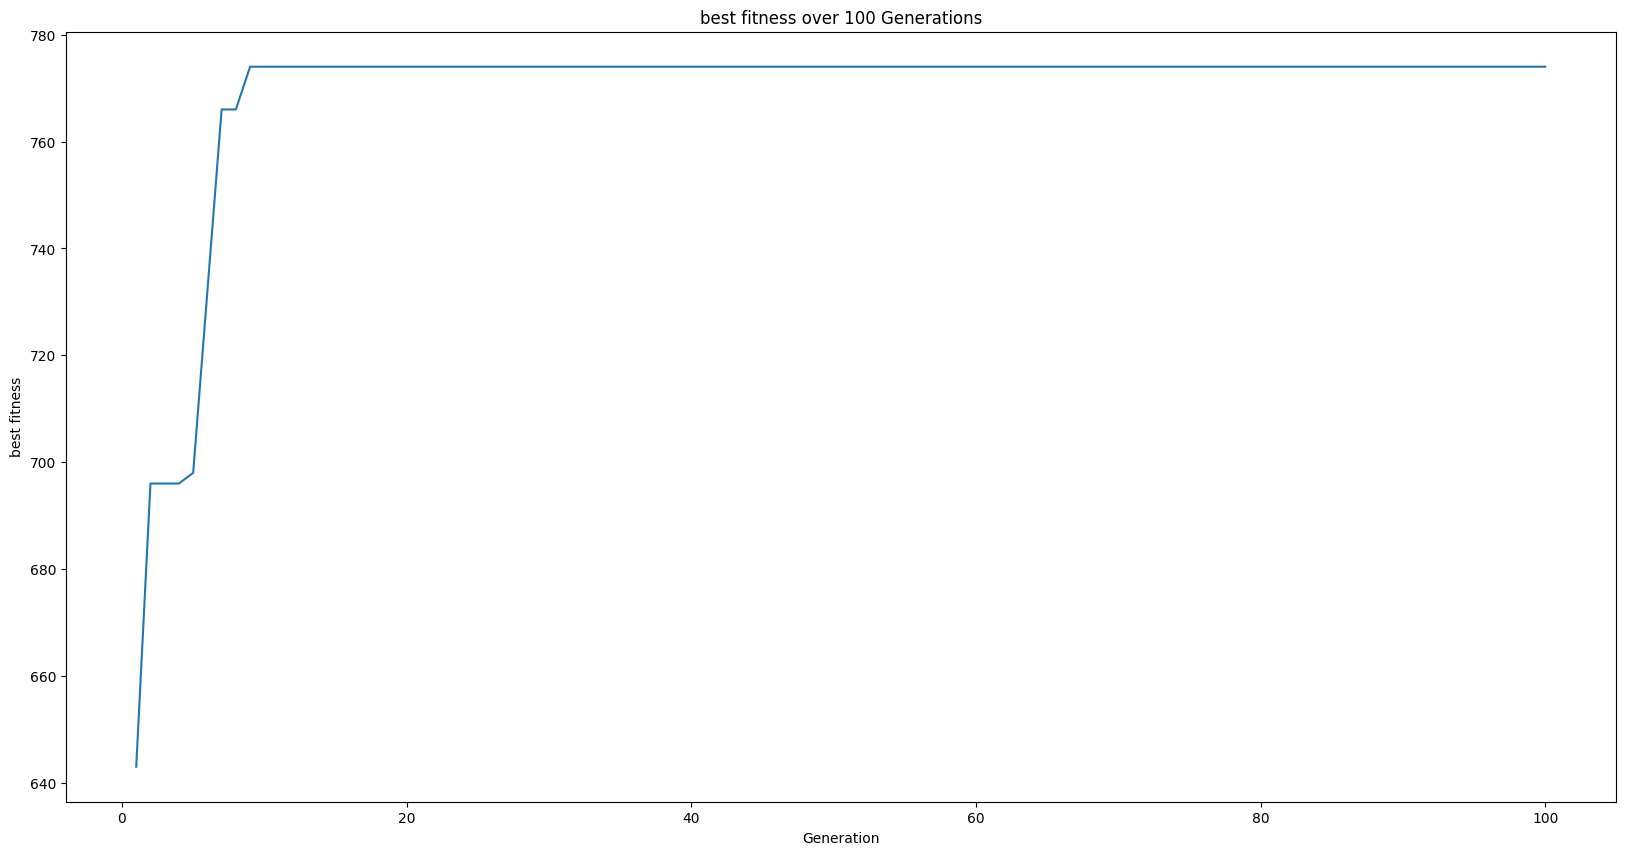

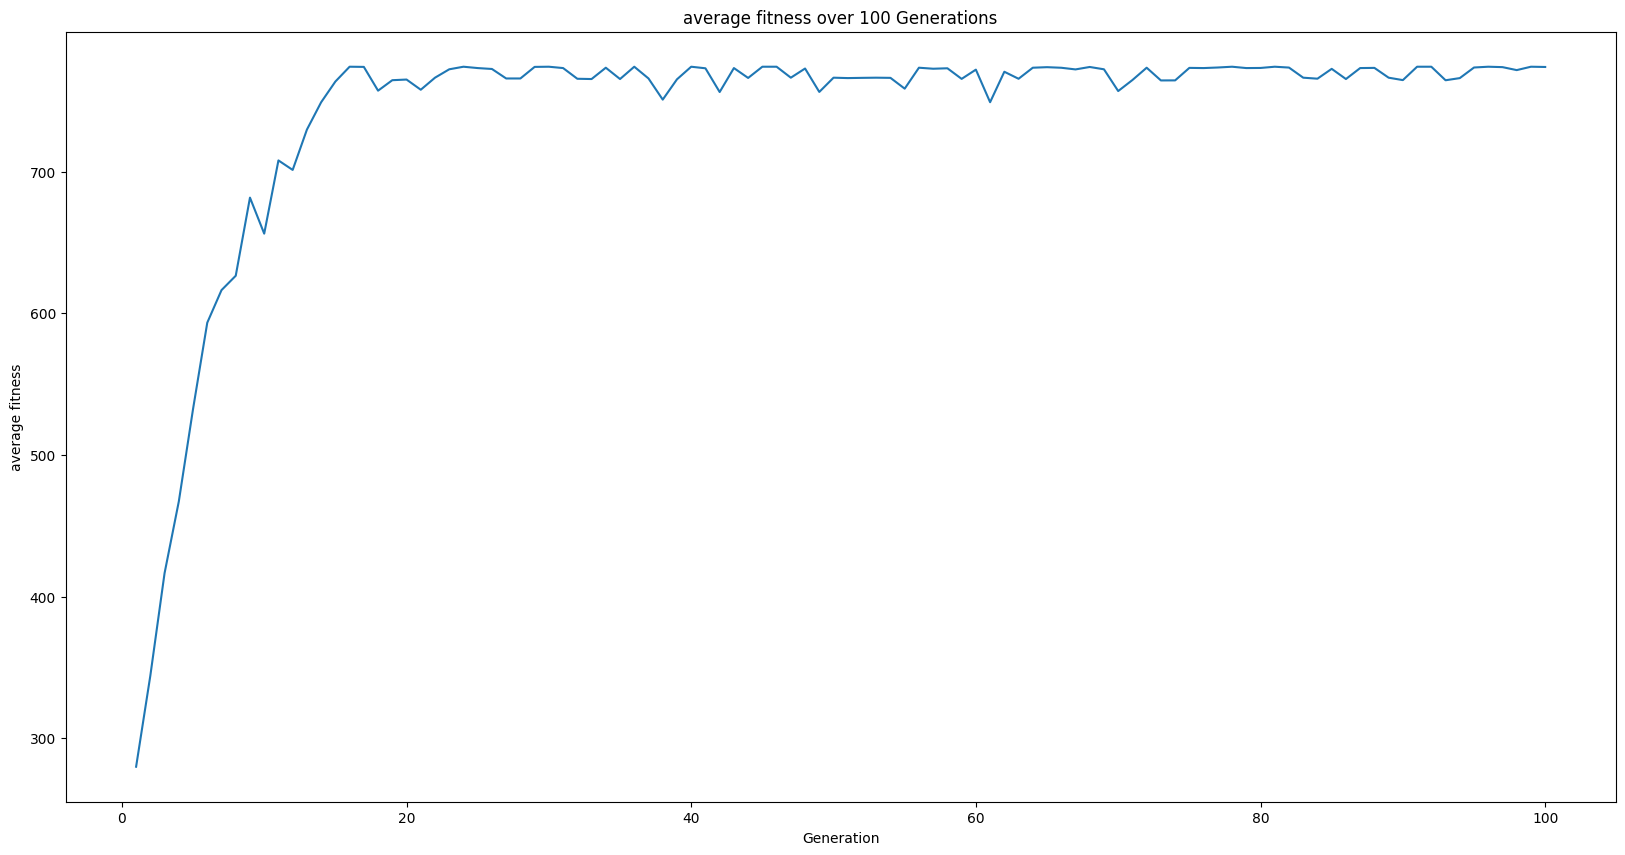

After 7 generations, we reached fitness's threshold (750)


In [ ]:
random.seed(42)
last_population_3_1_elitism, best_individual_3_1_elitism = run_genetic_algorithm_elitism(population, num_generations)
plot_best_fit(best_fitness_elitism, num_generations)
plot_avg_fit(avg_fitness_elitism, num_generations)
convergence_rate(best_fitness_elitism, 750)

Tổng kết thí nghiệm 3.1

In [ ]:
random.seed(42)
#Tổng kết thí nghiệm 3.1
best_fit_ex_3_1 = []
for i in range(30): #Ban đầu nhóm để 100 nhưng mà nó chạy lâu quá nên nhóm để nó xuống 30
  last_population_3_1_elitism, best_individual_3_1_elitism = run_genetic_algorithm_elitism(population, num_generations)
  best_fit_ex_3_1.append(fitness(best_individual_3_1_elitism))
  clear_output()

**Nhận xét thí nghiệm 3.1** - Dựa trên các kết quả thực nghiệm

3.2 Hướng tiếp cận theo tiêu chí dừng delta

In [ ]:
best_fitness_delta = []
avg_fitness_delta = []
generations = 0 #Khong phai la tham so num_generations, tham so nay dung de theo doi so generations da chay qua toi khi dap ung tieu chi dung
tournament_size = 2


def run_genetic_algorithm_delta(initial_population,max_generations, delta):
  population = initial_population.copy()
  best_fit = [] #Vấn đề nằm ở chỗ của 2 cái này
  avg_fit = [] # 
  for generation in range(num_generations):
        #Xác định individual có fitness tốt nhất trong mỗi thế hệ
        best_individual_current = max(population, key=fitness)
        best_fit.append(best_individual_current)
        #Xác định giá trị fitness trung bình trong quần thể trong mỗi thế hệ
        fit_values = [fitness(i) for i in population]
        mean_fit = mean(fit_values)
        avg_fit.append(mean_fit)
        population = selection_tournament(population, tournament_size)
        offspring_population = []
        for i in range(population_size):
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child = crossover_singlepoint(parent1, parent2, crossover_rate = crossover_rate)
            child = mutate_bitflip(child)
            offspring_population.append(child)
        best_individual_new = max(offspring_population, key=fitness)
        
        gene = generation + 1
        global generations
        generations = gene       
        if (fitness(best_individual_current) - fitness(best_individual_new)) >= delta:
            break #Do đã ngắt ở đây rồi nên cái việc cập nhật population mới là không xảy ra
        population = offspring_population

  Q = best_fit
  global best_fitness_delta
  best_fitness_delta = Q.copy()  
  T = avg_fit
  global avg_fitness_delta
  avg_fitness_delta = T.copy()

  best_individual = max(population, key=fitness)
  print("=======================================================================================")
  print("The exact solutions for knapsack is: ", correct_ans)
  print("Maximum values of knapsack is: ", best_fitness)
  print("Maximum weight of knapsack is: ", capacity)
  print("=======================================================================================")
  print("Best individual in population in final generation:", best_individual)
  print("Best fitness in population in final generation:", fitness(best_individual))
  print("Weights of the best individual: ", weight(best_individual))
  print(f"This is in the {generations} generation")
  print("=======================================================================================")

  return population, best_individual

The exact solutions for knapsack is:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Maximum values of knapsack is:  784
Maximum weight of knapsack is:  130
Best individual in population in final generation: [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]
Best fitness in population in final generation: 671
Weights of the best individual:  126
This is in the 2 generation


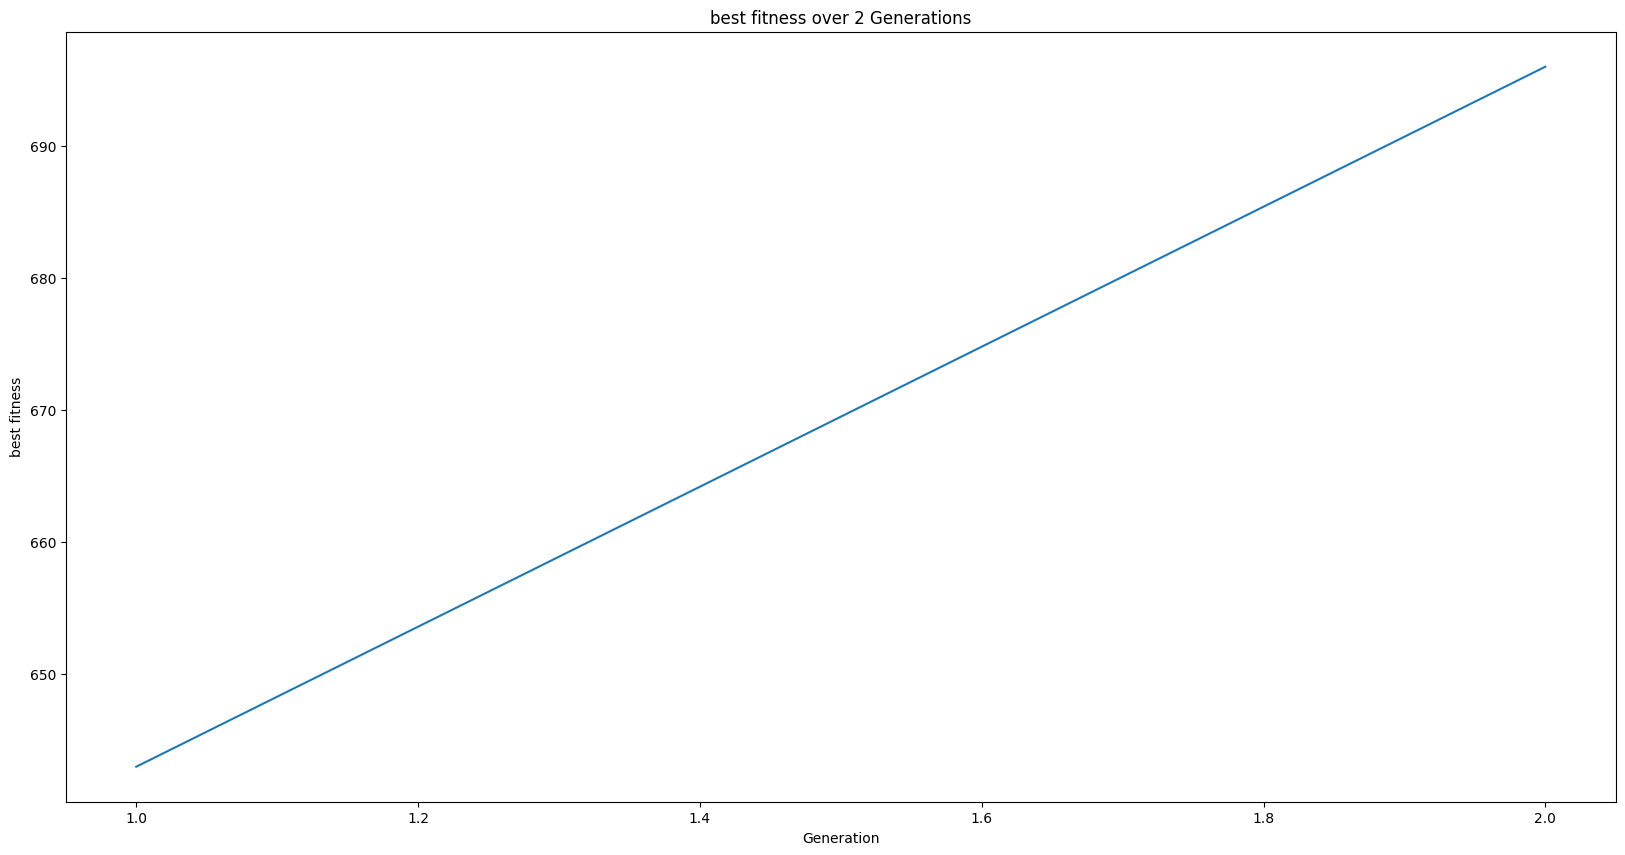

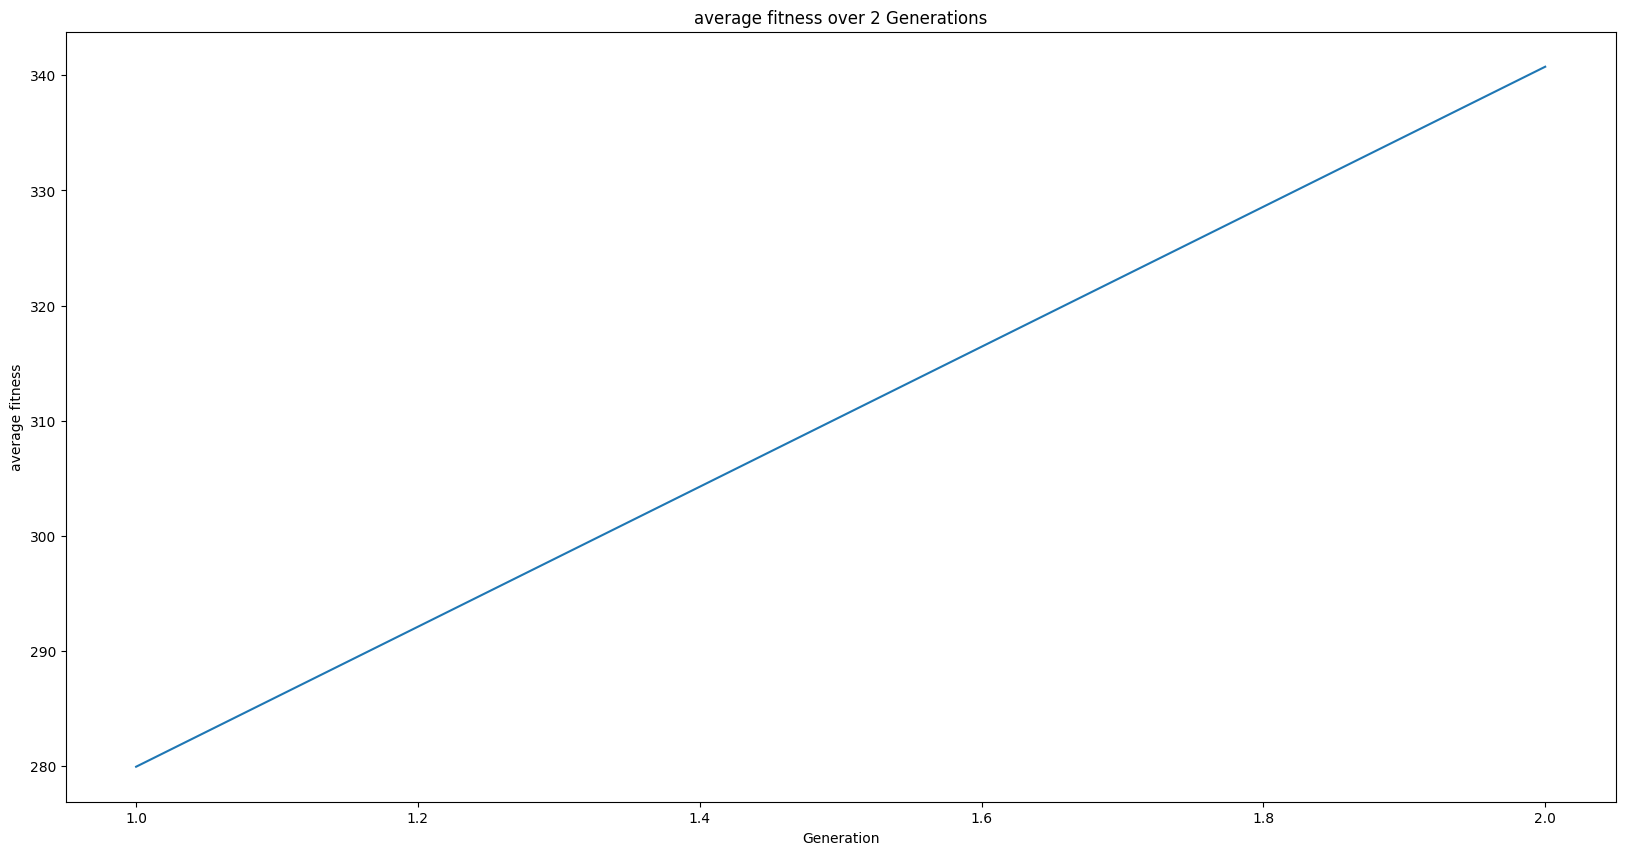

Can't reach the limit threshold (750)


In [ ]:
random.seed(42)
last_population_3_2_delta, best_individual_3_2_delta = run_genetic_algorithm_delta(population, num_generations, delta = 30)
plot_best_fit(best_fitness_delta, generations)
plot_avg_fit(avg_fitness_delta, generations)
convergence_rate(best_fitness_delta, 750)

Tổng kết thí nghiệm 3.2

In [ ]:
random.seed(42)
#Tổng kết thí nghiệm 3.1
best_fit_ex_3_2 = []
for i in range(30): #Ban đầu nhóm để 100 nhưng mà nó chạy lâu quá nên nhóm để nó xuống 30
  last_population_3_2_delta, best_individual_3_2_delta = run_genetic_algorithm_delta(population, num_generations,delta = 30)
  best_fit_ex_3_2.append(fitness(best_individual_3_2_delta))
  clear_output()

**Nhận xét thí nghiệm 3.2** - Ta lưu ý rằng với việc khởi tạo tiêu chí dừng delta quá nhỏ có thể dẫn đến cái việc mà giải thuật di truyền của chúng ta không đạt được kết quả tối ưu hơn do việc nó bị ngắt giữa chừng chỉ delta của chúng ta quá nhỏ, còn ngược lại với delta quá to thì khả năng cao cái việc mà ngắt khi có sự thụt lùi trong kết quả fitness là khó xảy ra, do theo như quan sát thì các giá trị fitness đối với cac tổ hợp vật phẩm được tạo ra với các giá trị như value, weight thì nó dao động không nhiều. 

Kết lại rằng việc cân nhắc chọn delta sao cho phù hợp thì còn dựa vào nhiều kinh nghiệm của người thiết kế, ở đây nhóm chọn delta bằng 20 cho nó dễ thấy rõ. Tuy nhiên việc dừng theo delta này cũng sẽ chấp nhận sự xuống dốc về giá trị fitness, miễn sao cái fitness này vẫn còn nhỏ hơn delta. Do đó theo thực nghiệm, nhóm quan sát thấy cách tiếp cận kiểu elitism cho ra kết quả phù hợp và khả quan hơn. 

**Tổng quan thí nghiệm 3**

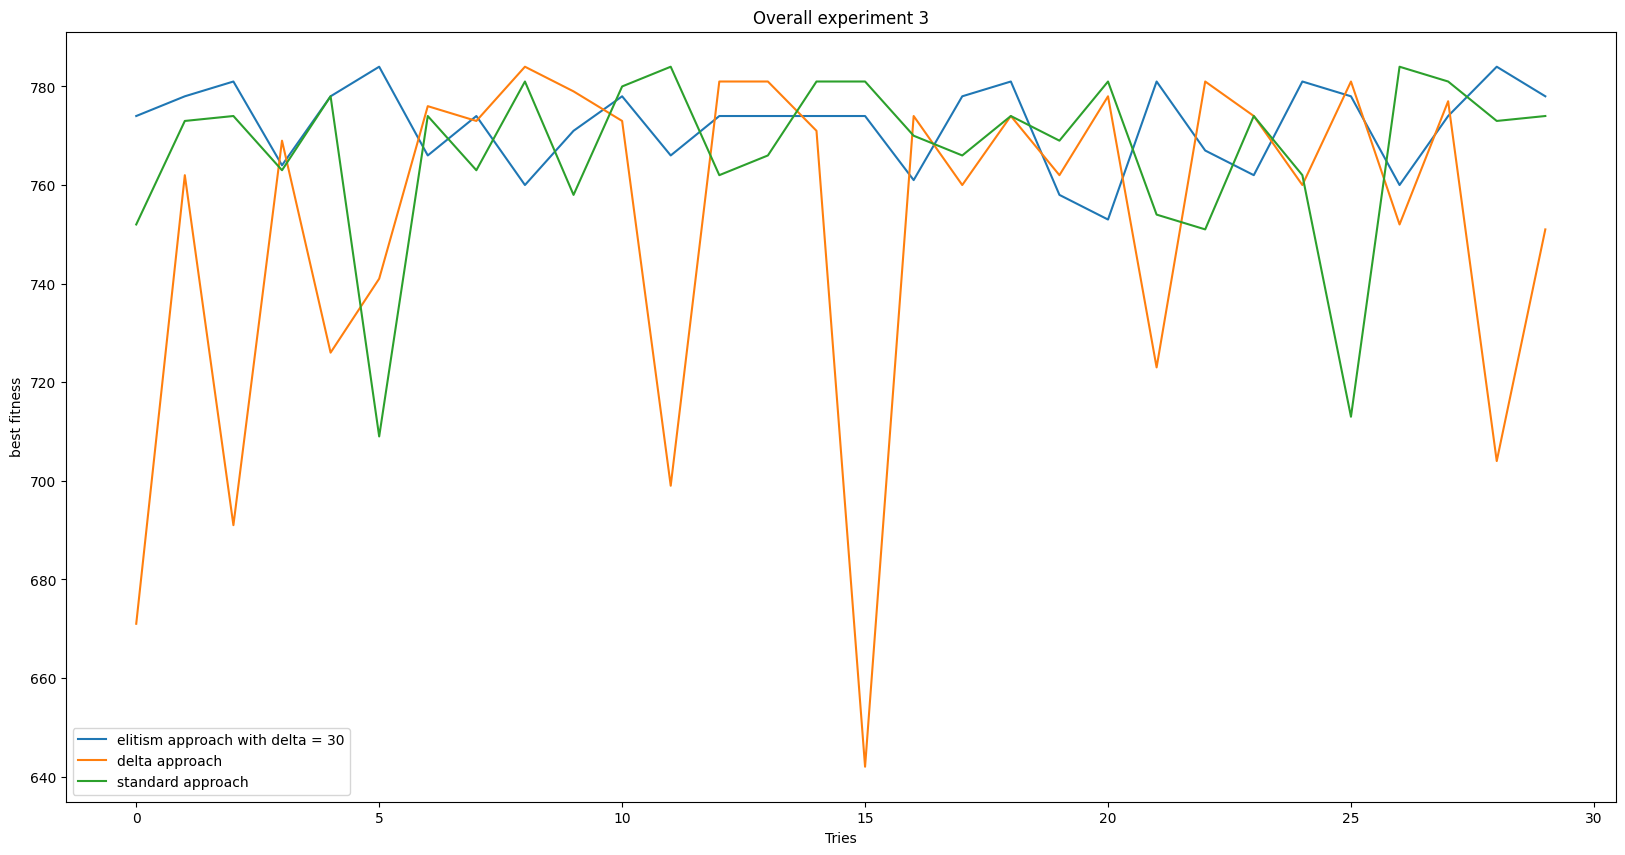

In [ ]:
  import matplotlib.pyplot as plt
  test_time = list(range(30))
  plt.figure(figsize=(20,10))
  plt.plot(test_time, best_fit_ex_3_1, label = 'elitism approach with delta = 30')
  plt.plot(test_time, best_fit_ex_3_2, label = 'delta approach')
  plt.plot(test_time, best_fit_ex_1_0, label = 'standard approach')
  plt.legend()
  plt.xlabel('Tries')
  plt.ylabel('best fitness')
  plt.title('Overall experiment 3')
  plt.show()

**Thí nghiệm 4**
--------------------------------------------------------
Thay đổi cân nặng và giá trị của các hộp. 

**Thí nghiệm 4.1** - Các hộp có cùng cân nặng và giá trị. 

In [ ]:
values = [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
weights = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
capacity = int(sum(weights) * 0.9)
print("values: ", values)
print("weights: ", weights)
print("capacity: ", capacity)

values:  [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
weights:  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
capacity:  90


In [ ]:
random.seed(42)
population_same = [[random.randint(0, 1) for i in range(num_items)] 
                  for j in range(population_size)]

Câu hỏi: Nếu như nhau như vầy và capacity nó cao thì nó có hội tụ nhanh tới kết quả tối ưu toàn cục được kg?

In [ ]:
knapsack_brute_force(weights=weights, values=values, capacity=capacity)

([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 270, 90)

In [ ]:
correct_ans, best_fitness, total_weight = knapsack_brute_force(weights=weights, values=values, capacity=capacity)

print("The exact solutions for knapsack is: ", correct_ans)
print("Maximum values of knapsack is: ", best_fitness)
print("Total weight for the best solution is: ", total_weight)

The exact solutions for knapsack is:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Maximum values of knapsack is:  270
Total weight for the best solution is:  90


The exact solutions for knapsack is:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Maximum values of knapsack is:  270
Maximum weight of knapsack is:  90
Best individual in population in final generation: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
Best fitness in population in final generation: 270
Weights of the best individual:  90


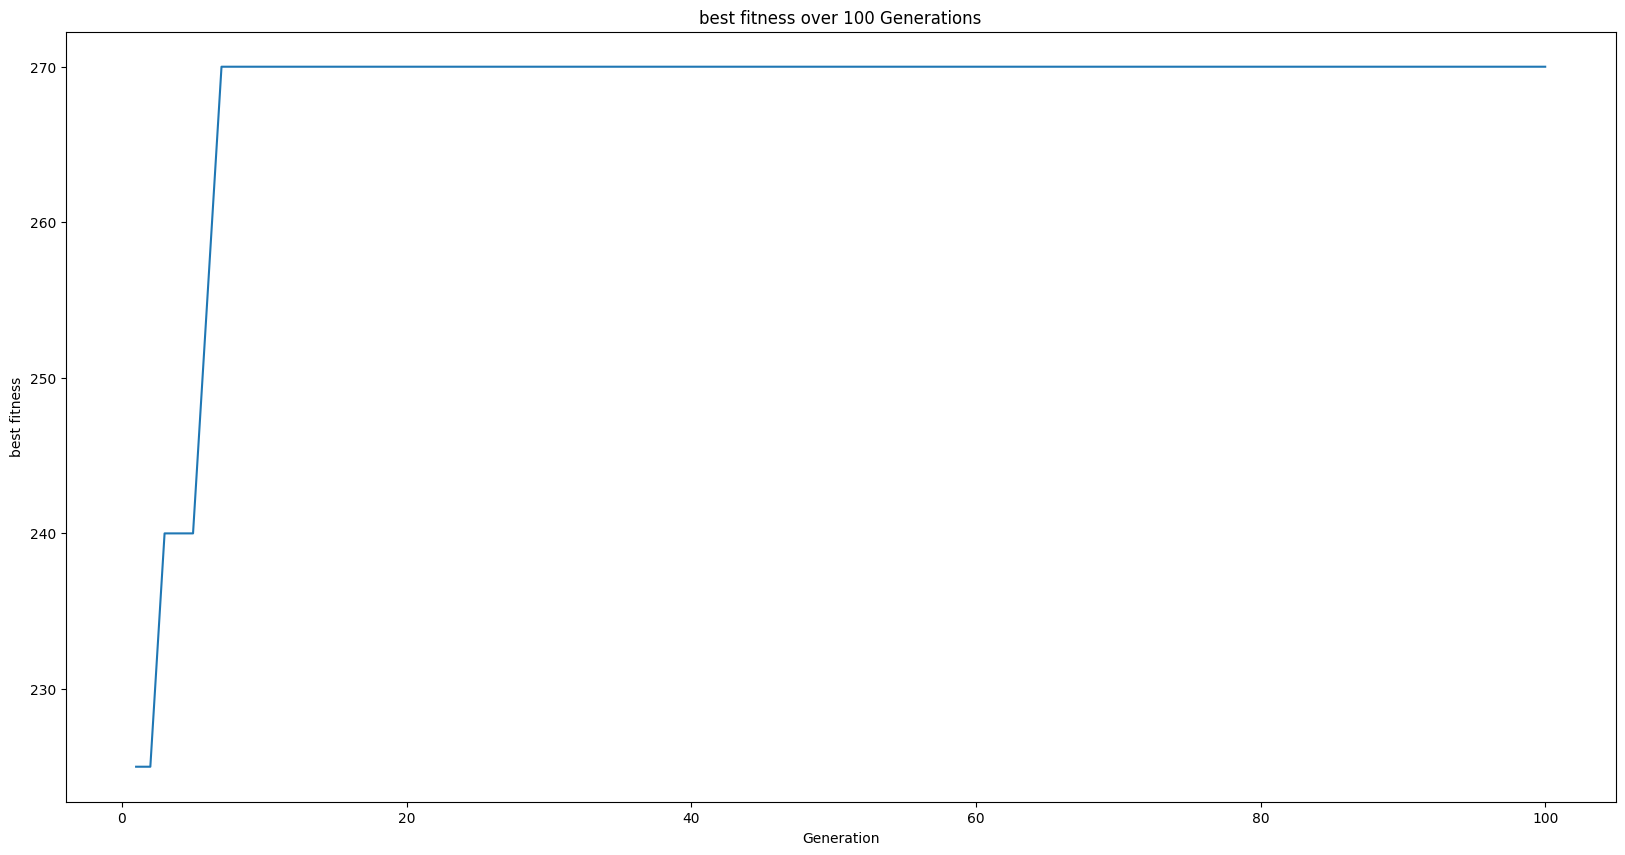

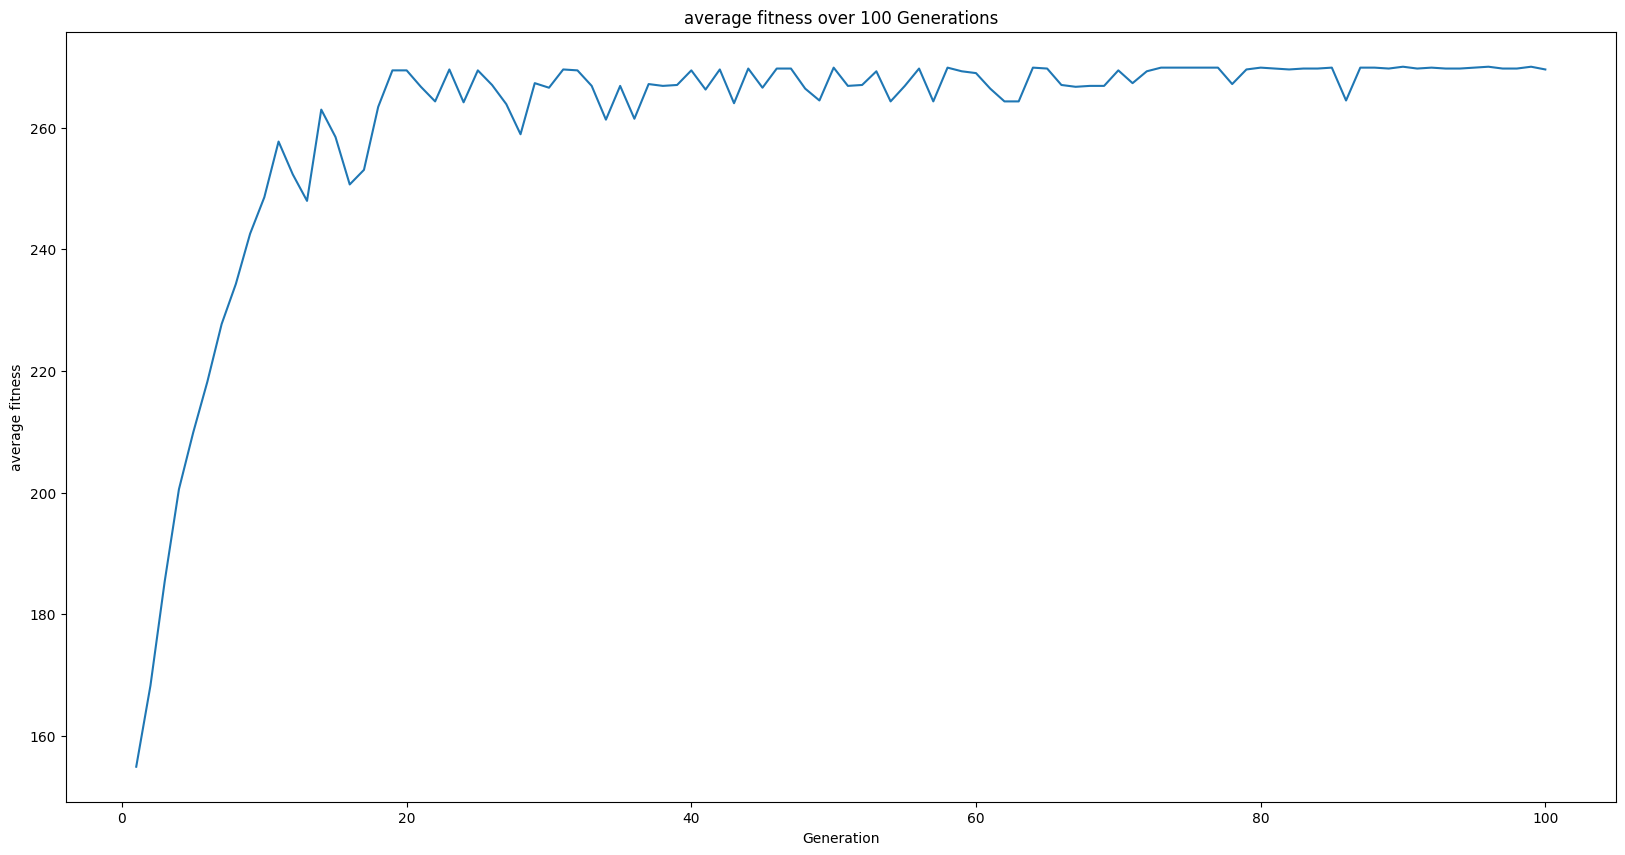

In [ ]:
random.seed(42)
last_population_4_1, best_individual_4_1 = run_genetic_algorithm_original(population_same, num_generations)
plot_best_fit(best_fitness_standard, num_generations)
plot_avg_fit(avg_fitness_standard, num_generations)

Tổng kết thí nghiệm 4.1

In [ ]:
random.seed(42)
best_fit_ex_4_1 = []

for i in range(30):
    last_population_4_1, best_individual_4_1 = run_genetic_algorithm_original(population_same, num_generations)
    best_fit_ex_4_1.append(fitness(best_individual_4_1))
    clear_output()


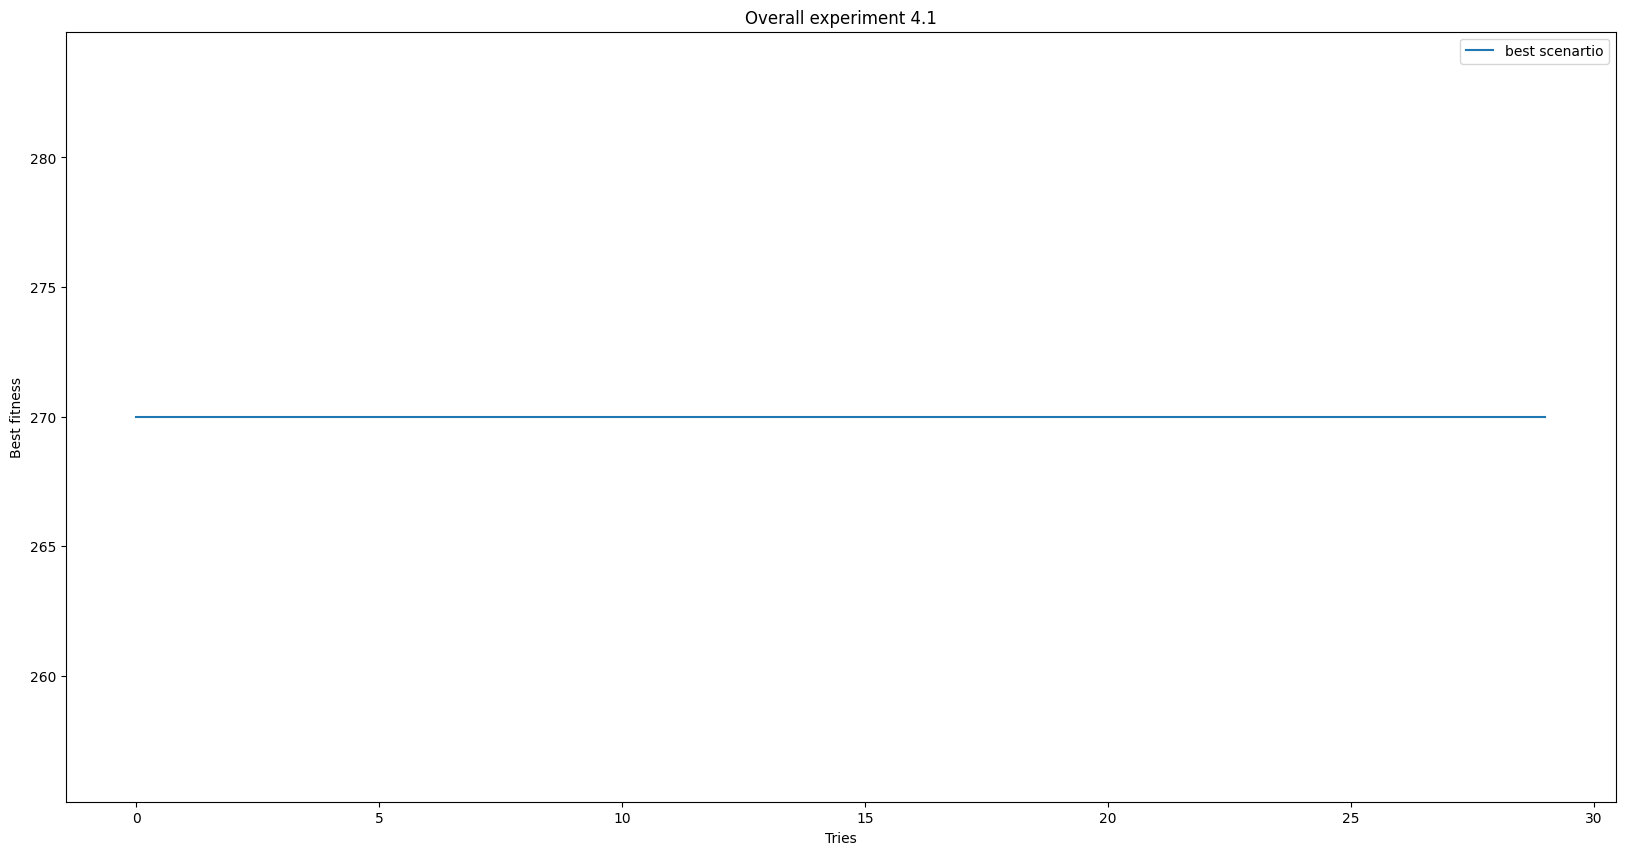

In [ ]:
import matplotlib.pyplot as plt

test_time = list(range(30))

fig = plt.figure(figsize=(20, 10))

plt.plot(test_time, best_fit_ex_4_1, label='best scenartio')

plt.legend()
plt.xlabel('Tries')
plt.ylabel('Best fitness')
plt.title('Overall experiment 4.1')

plt.show()

**Thí nghiệm 4.2** - Các chỉ số (cân nặng, giá trị) của vật phẩm có phương sai cao. 

In [ ]:
random.seed(42)
import random
import math

weights = [random.randint(1, 100) for _ in range(20)]
values = [random.randint(1, 100) for _ in range(20)]
capacity = math.floor(sum(weights) * 0.3)

print("Weights:", weights)
print("Values:", values)
print("Capacity: ", capacity)
def calculate_variance(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    return variance

weights_variance = calculate_variance(weights)
values_variance = calculate_variance(values)

print("Weights Variance:", weights_variance)
print("Values Variance:", values_variance)


Weights: [82, 15, 4, 95, 36, 32, 29, 18, 95, 14, 87, 95, 70, 12, 76, 55, 5, 4, 12, 28]
Values: [30, 65, 78, 4, 72, 26, 92, 84, 90, 70, 54, 29, 58, 76, 36, 1, 98, 21, 90, 55]
Capacity:  259
Weights Variance: 1138.96
Values Variance: 861.8475000000001


In [ ]:
random.seed(42)
population_highvar = [[random.randint(0, 1) for i in range(num_items)] 
                  for j in range(population_size)]

The exact solutions for knapsack is:  [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
Maximum values of knapsack is:  859
Maximum weight of knapsack is:  259
Best individual in population in final generation: [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]
Best fitness in population in final generation: 808
Weights of the best individual:  257


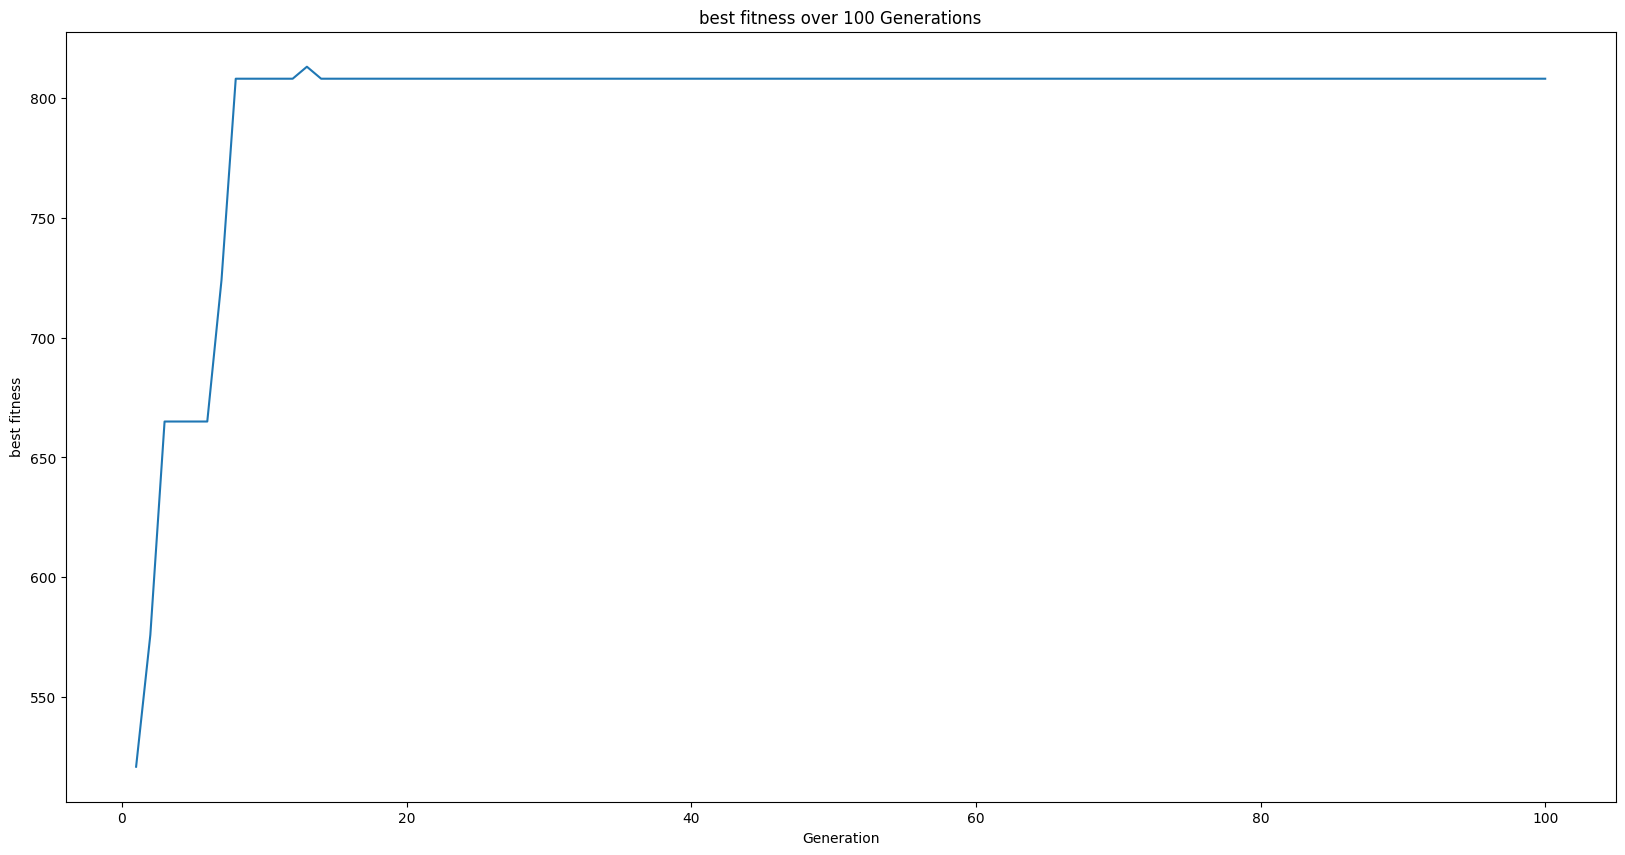

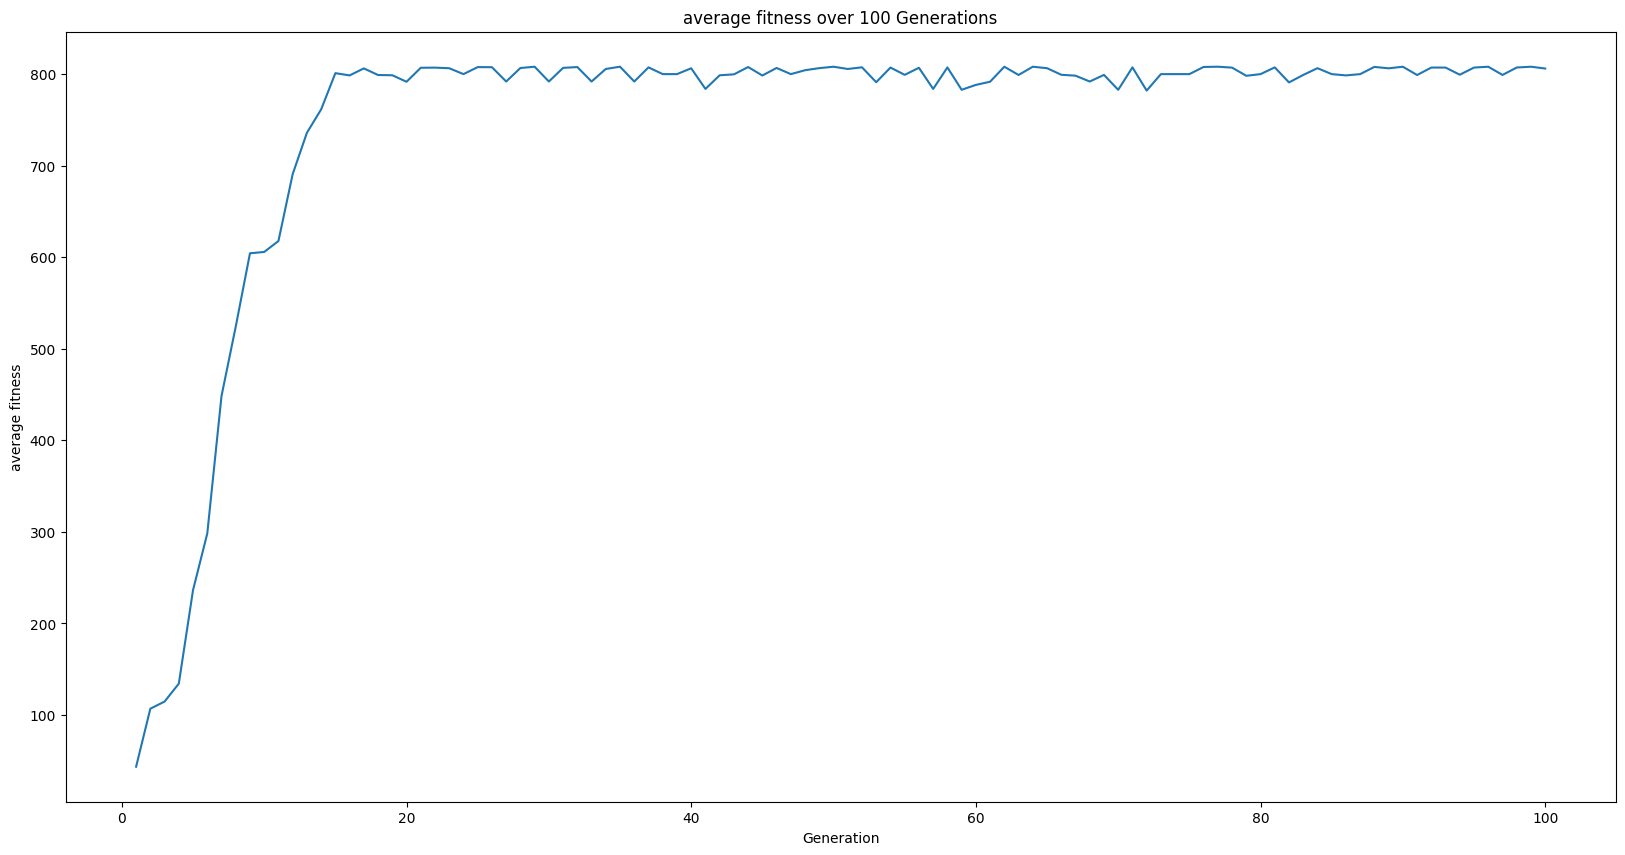

In [ ]:
correct_ans, best_fitness, total_weight = knapsack_brute_force(weights = weights, values = values, capacity = capacity)
random.seed(42)
last_population_4_2, best_individual_4_2 = run_genetic_algorithm_original(population_highvar, num_generations)
plot_best_fit(best_fitness_standard, num_generations)
plot_avg_fit(avg_fitness_standard, num_generations)

In [ ]:
random.seed(42)
best_fit_ex_4_2 = []

for i in range(30):
    last_population_4_2, best_individual_4_2 = run_genetic_algorithm_original(population_highvar, num_generations)
    best_fit_ex_4_2.append(fitness(best_individual_4_2))
    clear_output()


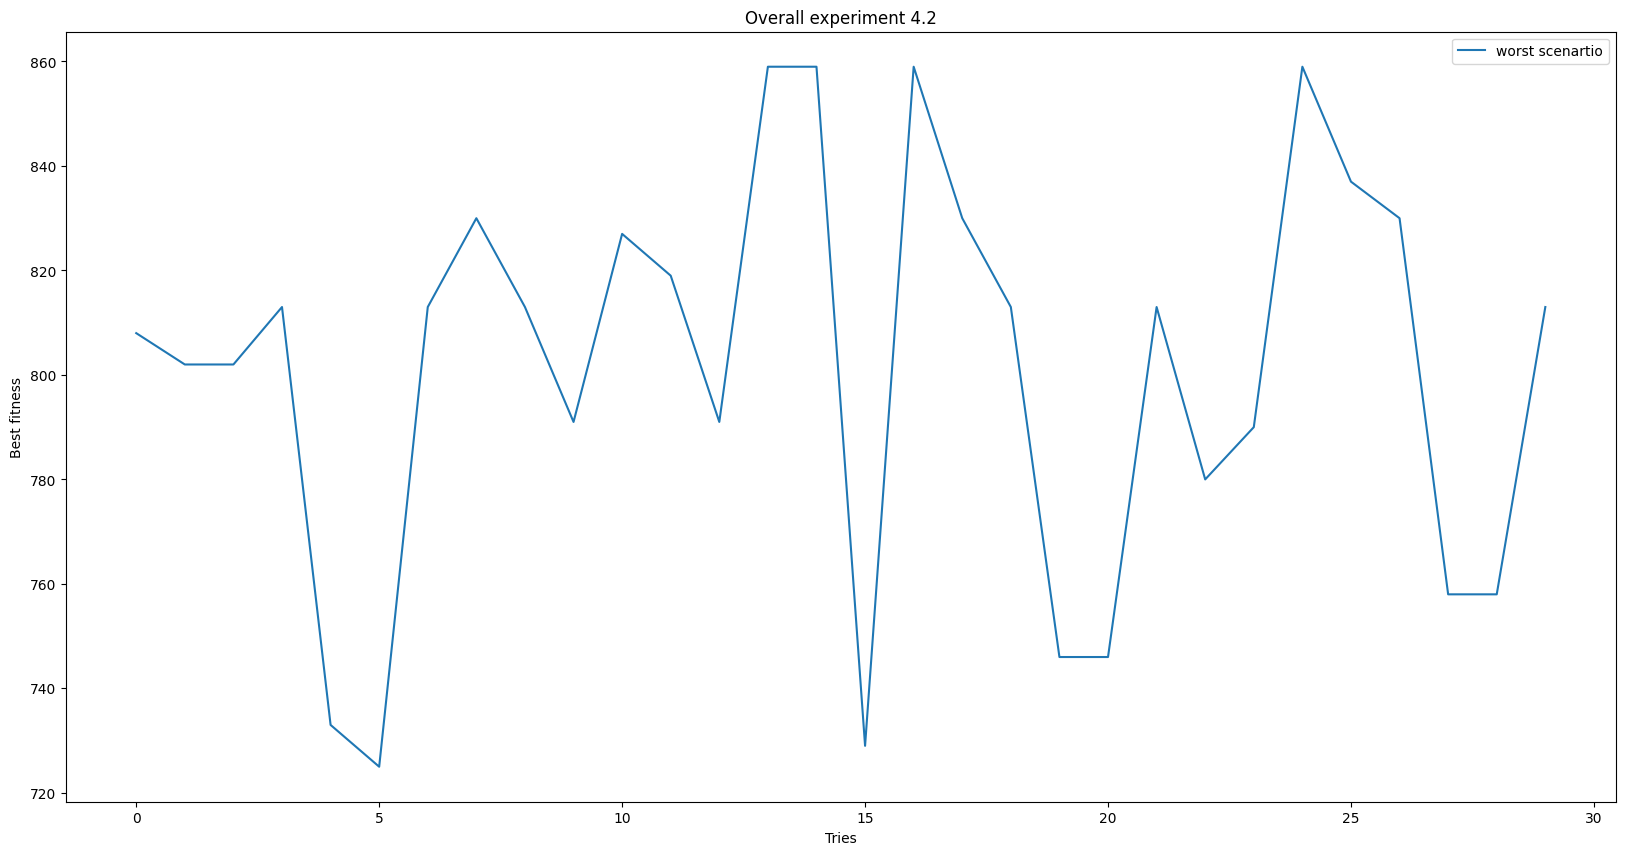

In [ ]:
import matplotlib.pyplot as plt

test_time = list(range(30))

fig = plt.figure(figsize=(20, 10))

plt.plot(test_time, best_fit_ex_4_2, label='worst scenartio')

plt.legend()
plt.xlabel('Tries')
plt.ylabel('Best fitness')
plt.title('Overall experiment 4.2')

plt.show()